<a href="https://colab.research.google.com/github/CorralesK/Lab04_EDA/blob/main/lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 04 - EDA**

In [ ]:
# Cargando las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, linregress

## 1. Carga y comprensión inicial de los datos

In [ ]:
# Ruta del archivo
filepath = 'https://raw.githubusercontent.com/CorralesK/Lab04_EDA/main/datos.csv'

# Cargar el dataset
df = pd.read_csv(filepath)

In [ ]:
# Verificar el formato de las columnas. Comprobar el tipo de cada una
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnig

In [ ]:
# Explorar las primeras filas
print(df.head())

  churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0             99           16.78

In [ ]:
# Observar la cantidad de filas y columnas
print(f"Dimensiones del dataset (filas, columnas): {df.shape}")

Dimensiones del dataset (filas, columnas): (5000, 18)


## 2. Limpiar y preparar los datos

In [ ]:
# Identificar y tratar valores nulos
print("Valores nulos por columna:")
df.isnull().sum()

Valores nulos por columna:


churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64

In [ ]:
# Eliminar duplicados

# - Visualización de datos duplicados
duplicados = df[df.duplicated(keep=False)]
print(duplicados)

# Al imprimir en Index aparece las columnas que tienen duplicados, en este caso, no hay duplicados por lo que en Idex está vacío

Empty DataFrame
Columns: [churn, accountlength, internationalplan, voicemailplan, numbervmailmessages, totaldayminutes, totaldaycalls, totaldaycharge, totaleveminutes, totalevecalls, totalevecharge, totalnightminutes, totalnightcalls, totalnightcharge, totalintlminutes, totalintlcalls, totalintlcharge, numbercustomerservicecalls]
Index: []


In [ ]:
# - Eliminar duplicados
# Igual hago la parte de eliminar duplicados y se imprime la cantidad de duplicados que elimina
initial_rows = df.shape[0]
df = df.drop_duplicates()
print(f"Filas eliminadas por duplicados: {initial_rows - df.shape[0]}")

Filas eliminadas por duplicados: 0


In [ ]:
# Revisar valores atípicos

# Función reutilizable para identificar atípicos con el método IQR.
def identificar_atipicos(data, columna, factor=1.5):
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    mediana = data[columna].median()
    valor_minimo = data[columna].min()
    valor_maximo = data[columna].max()

    print(f"\nResumen estadístico para {columna}:")
    print(f"- Primer cuartil (Q1): {Q1}")
    print(f"- Tercer cuartil (Q3): {Q3}")
    print(f"- Rango intercuartílico (IQR): {IQR}")
    print(f"- Mediana: {mediana}")
    print(f"- Valor mínimo: {valor_minimo}")
    print(f"- Valor máximo: {valor_maximo}\n")

    # Sacar cuales son los limites
    limite_inferior = Q1 - (factor * IQR)
    limite_superior = Q3 + (factor * IQR)

    return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

In [ ]:
# - Identificar atípicos en todas las columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    atipicos = identificar_atipicos(df, col)
    print(f"- Valores atípicos: {len(atipicos)} registros")
    if len(atipicos) > 0:
        print(f"- Rango de valores atípicos: {atipicos[col].min()} a {atipicos[col].max()}")


Resumen estadístico para accountlength:
- Primer cuartil (Q1): 73.0
- Tercer cuartil (Q3): 127.0
- Rango intercuartílico (IQR): 54.0
- Mediana: 100.0
- Valor mínimo: 1
- Valor máximo: 243

- Valores atípicos: 24 registros
- Rango de valores atípicos: 209 a 243

Resumen estadístico para numbervmailmessages:
- Primer cuartil (Q1): 0.0
- Tercer cuartil (Q3): 17.0
- Rango intercuartílico (IQR): 17.0
- Mediana: 0.0
- Valor mínimo: 0
- Valor máximo: 52

- Valores atípicos: 60 registros
- Rango de valores atípicos: 43 a 52

Resumen estadístico para totaldayminutes:
- Primer cuartil (Q1): 143.7
- Tercer cuartil (Q3): 216.2
- Rango intercuartílico (IQR): 72.5
- Mediana: 180.1
- Valor mínimo: 0.0
- Valor máximo: 351.5

- Valores atípicos: 34 registros
- Rango de valores atípicos: 0.0 a 351.5

Resumen estadístico para totaldaycalls:
- Primer cuartil (Q1): 87.0
- Tercer cuartil (Q3): 113.0
- Rango intercuartílico (IQR): 26.0
- Mediana: 100.0
- Valor mínimo: 0
- Valor máximo: 165

- Valores atípic

In [ ]:
# Convertir tipos de datos
# - Identificar las columnas y sus tipos actuales
df.dtypes

churn                          object
accountlength                   int64
internationalplan              object
voicemailplan                  object
numbervmailmessages             int64
totaldayminutes               float64
totaldaycalls                   int64
totaldaycharge                float64
totaleveminutes               float64
totalevecalls                   int64
totalevecharge                float64
totalnightminutes             float64
totalnightcalls                 int64
totalnightcharge              float64
totalintlminutes              float64
totalintlcalls                  int64
totalintlcharge               float64
numbercustomerservicecalls      int64
dtype: object

In [ ]:
# - Convertir tipos de datos
df['churn'] = df['churn'].astype('string')
df['internationalplan'] = df['internationalplan'].astype('string')
df['voicemailplan'] = df['voicemailplan'].astype('string')

In [ ]:
# - Verificar los tipos de datos
df.dtypes

churn                         string[python]
accountlength                          int64
internationalplan             string[python]
voicemailplan                 string[python]
numbervmailmessages                    int64
totaldayminutes                      float64
totaldaycalls                          int64
totaldaycharge                       float64
totaleveminutes                      float64
totalevecalls                          int64
totalevecharge                       float64
totalnightminutes                    float64
totalnightcalls                        int64
totalnightcharge                     float64
totalintlminutes                     float64
totalintlcalls                         int64
totalintlcharge                      float64
numbercustomerservicecalls             int64
dtype: object

In [ ]:
# Cambiar nombre de columnas si procede

# No es necesario cambiar nombres, pero si fuera el caso:
# df.rename(columns={"old_name": "new_name"}, inplace=True)
print("Nombres de columnas actuales:")
df.columns

Nombres de columnas actuales:


Index(['churn', 'accountlength', 'internationalplan', 'voicemailplan',
       'numbervmailmessages', 'totaldayminutes', 'totaldaycalls',
       'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge',
       'totalnightminutes', 'totalnightcalls', 'totalnightcharge',
       'totalintlminutes', 'totalintlcalls', 'totalintlcharge',
       'numbercustomerservicecalls'],
      dtype='object')

In [ ]:
# Tratar con variables categóricas
categorical_cols = df.select_dtypes(include='string').columns

print("Variables categóricas identificadas:", categorical_cols.tolist())

for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())

Variables categóricas identificadas: ['churn', 'internationalplan', 'voicemailplan']

Distribución de churn:
churn
No     4293
Yes     707
Name: count, dtype: Int64

Distribución de internationalplan:
internationalplan
no     4527
yes     473
Name: count, dtype: Int64

Distribución de voicemailplan:
voicemailplan
no     3677
yes    1323
Name: count, dtype: Int64


## 3. Análisis univariado

In [ ]:
# Estadísticas descriptivas
df.describe()

accountlength  numbervmailmessages  totaldayminutes  totaldaycalls  \
count     5000.00000          5000.000000      5000.000000    5000.000000   
mean       100.25860             7.755200       180.288900     100.029400   
std         39.69456            13.546393        53.894699      19.831197   
min          1.00000             0.000000         0.000000       0.000000   
25%         73.00000             0.000000       143.700000      87.000000   
50%        100.00000             0.000000       180.100000     100.000000   
75%        127.00000            17.000000       216.200000     113.000000   
max        243.00000            52.000000       351.500000     165.000000   

       totaldaycharge  totaleveminutes  totalevecalls  totalevecharge  \
count     5000.000000      5000.000000    5000.000000     5000.000000   
mean        30.649668       200.636560     100.191000       17.054322   
std          9.162069        50.551309      19.826496        4.296843   
min          0.000000         0.000000       0.000000        0.000000   
25%         24.430000       166.375000      87.000000       14.140000   
50%         30.620000       201.000000     100.000000       17.090000   
75%         36.750000       234.100000     114.000000       19.900000   
max         59.760000       363.700000     170.000000       30.910000   

       totalnightminutes  totalnightcalls  totalnightcharge  totalintlminutes  \
count        5000.000000      5000.000000       5000.000000       5000.000000   
mean          200.391620        99.919200          9.017732         10.261780   
std            50.527789        19.958686          2.273763          2.761396   
min             0.000000         0.000000          0.000000          0.000000   
25%           166.900000        87.000000          7.510000          8.500000   
50%           200.400000       100.000000          9.020000         10.300000   
75%           234.700000       113.000000         10.560000         12.000000   
max           395.000000       175.000000         17.770000         20.000000   

       totalintlcalls  totalintlcharge  numbercustomerservicecalls  
count     5000.000000      5000.000000                 5000.000000  
mean         4.435200         2.771196                    1.570400  
std          2.456788         0.745514                    1.306363  
min          0.000000         0.000000                    0.000000  
25%          3.000000         2.300000                    1.000000  
50%          4.000000         2.780000                    1.000000  
75%          6.000000         3.240000                    2.000000  
max         20.000000         5.400000                    9.000000

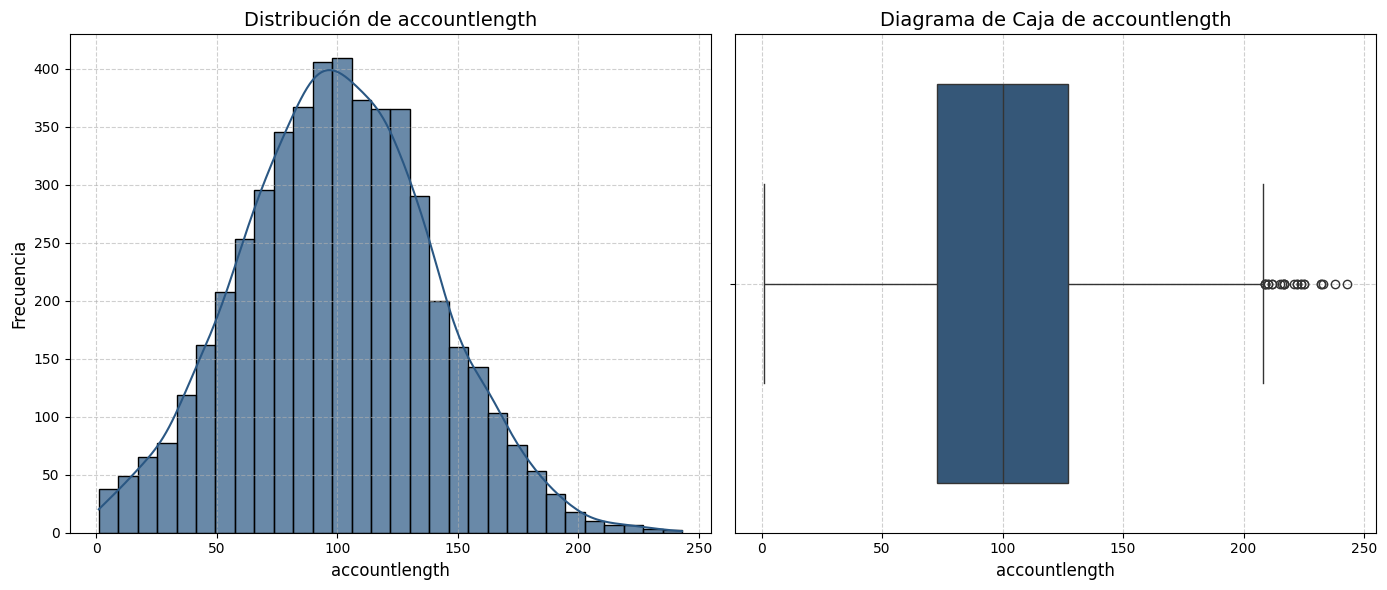

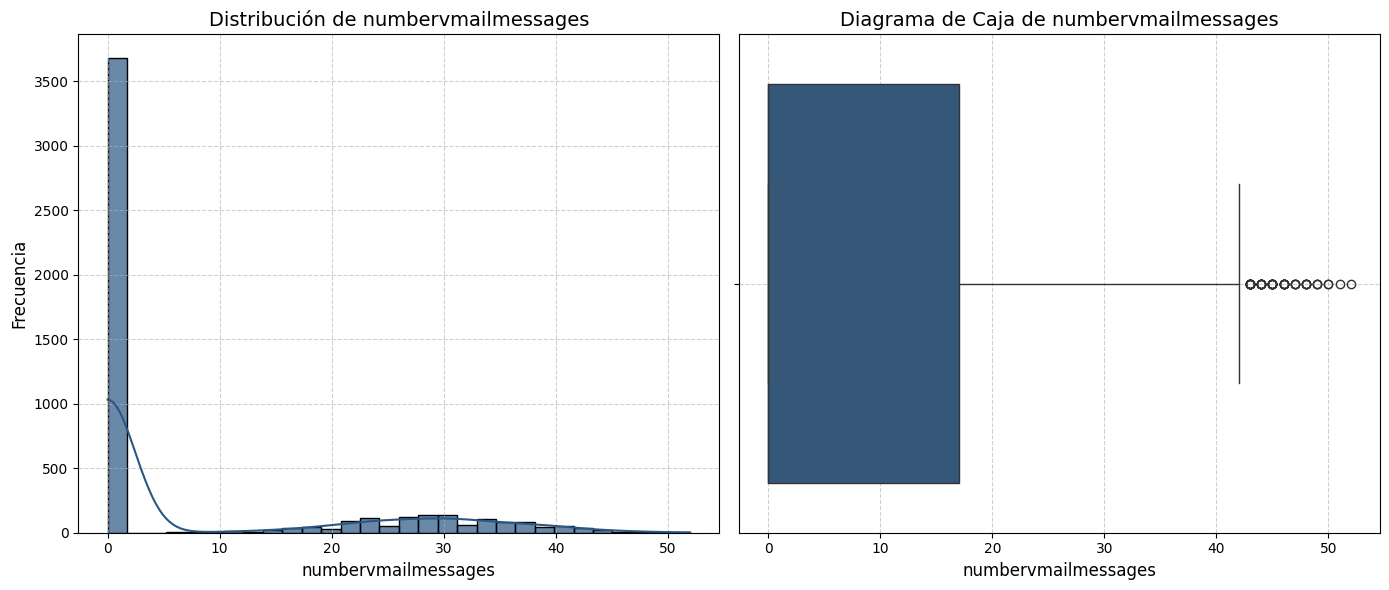

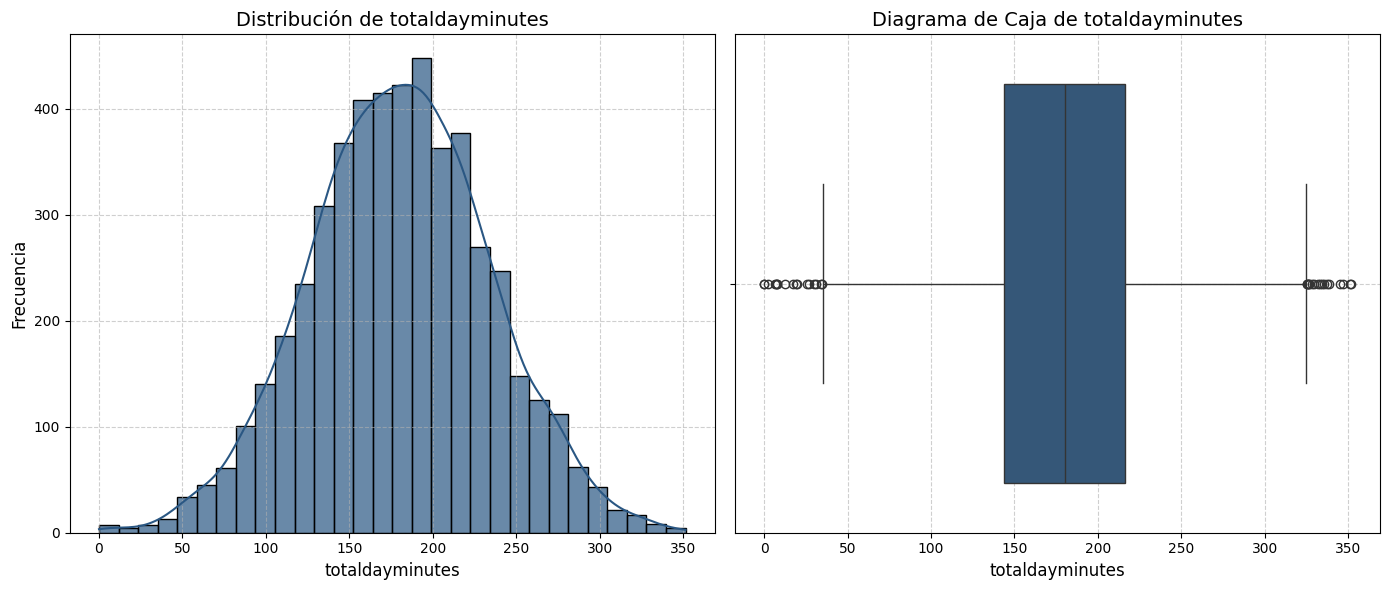

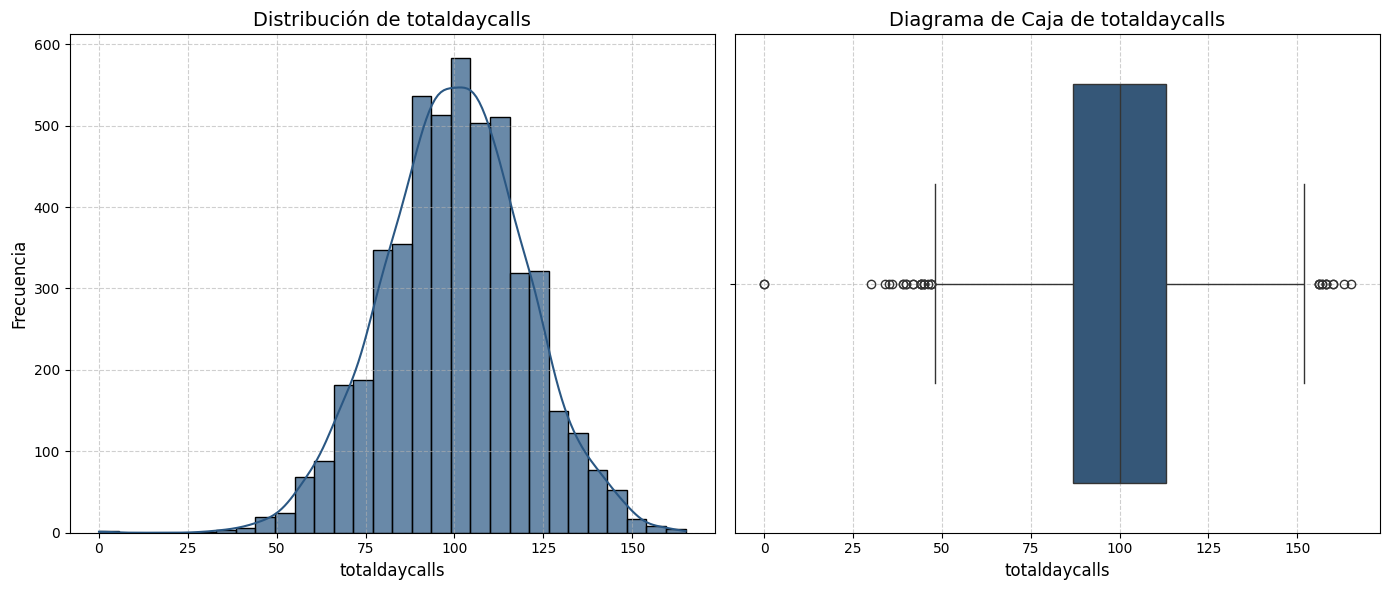

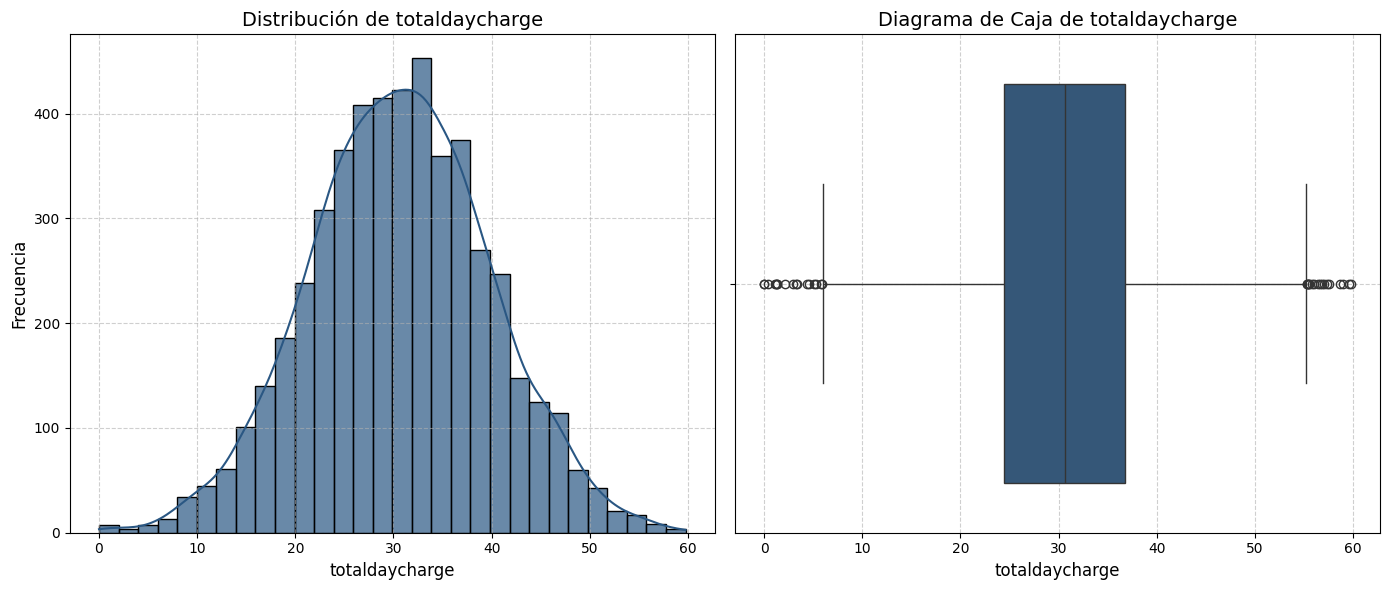

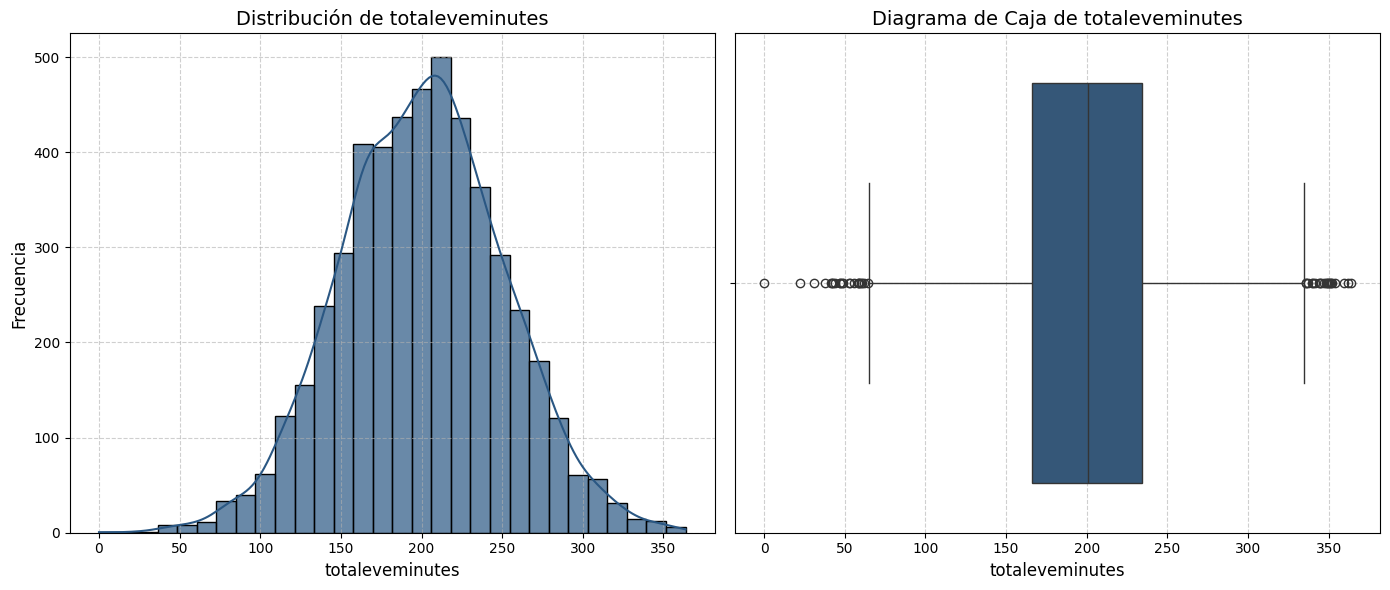

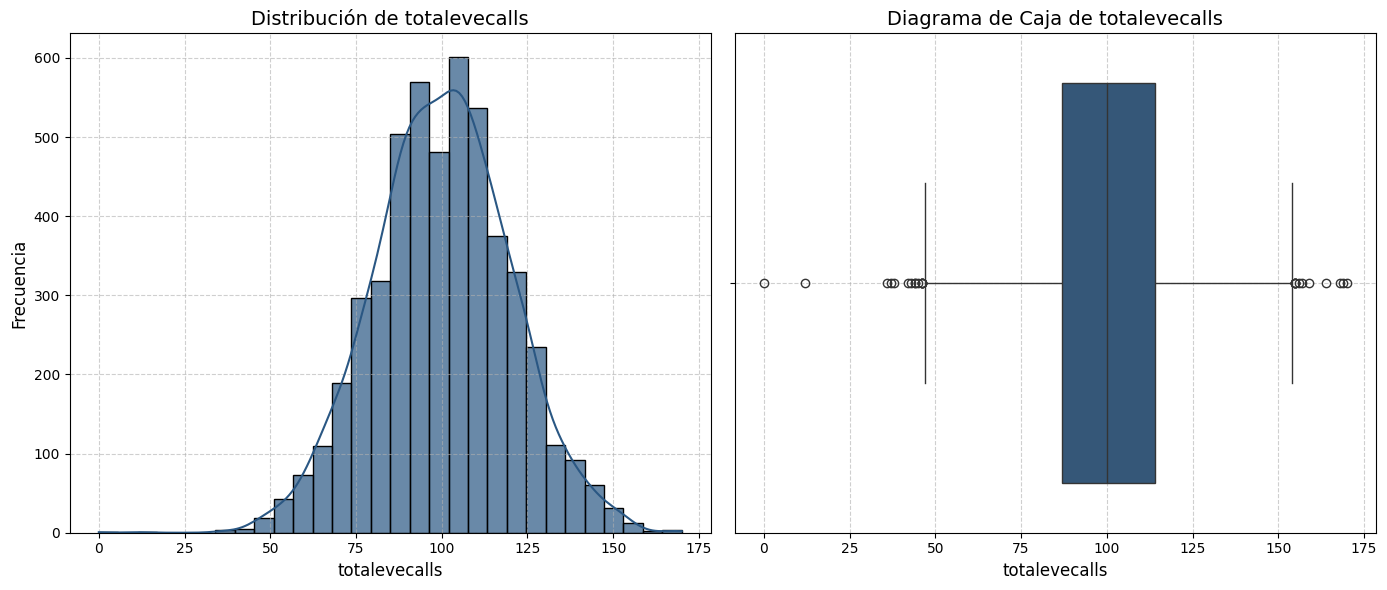

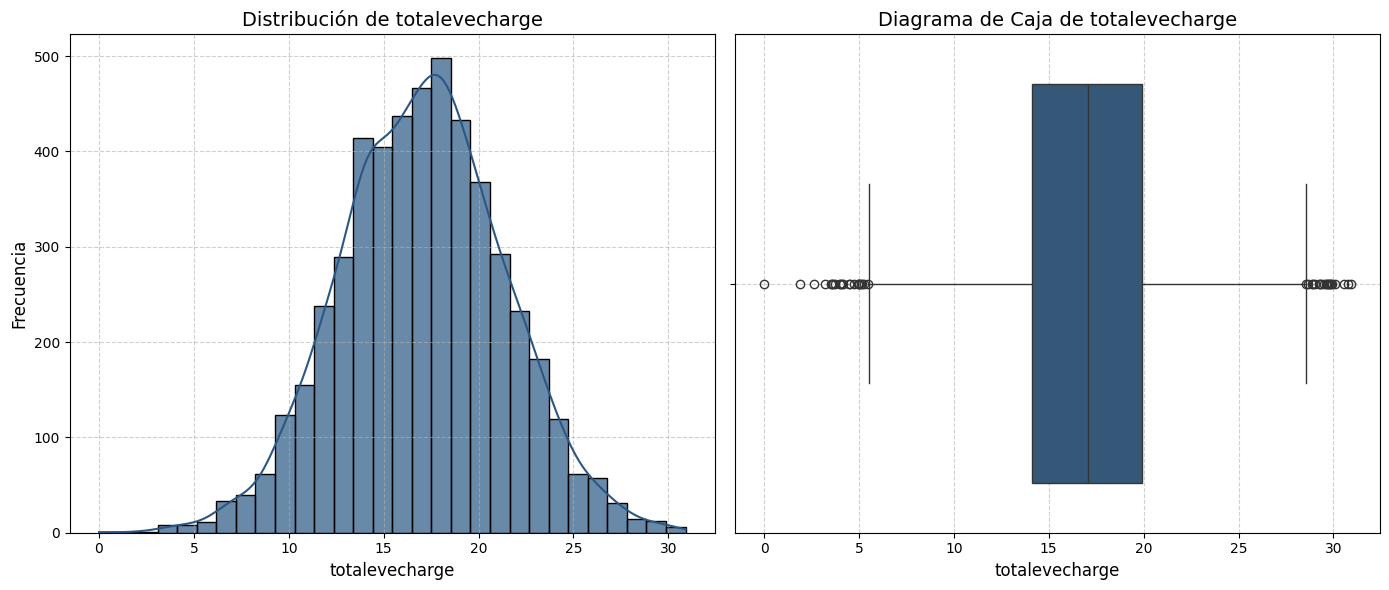

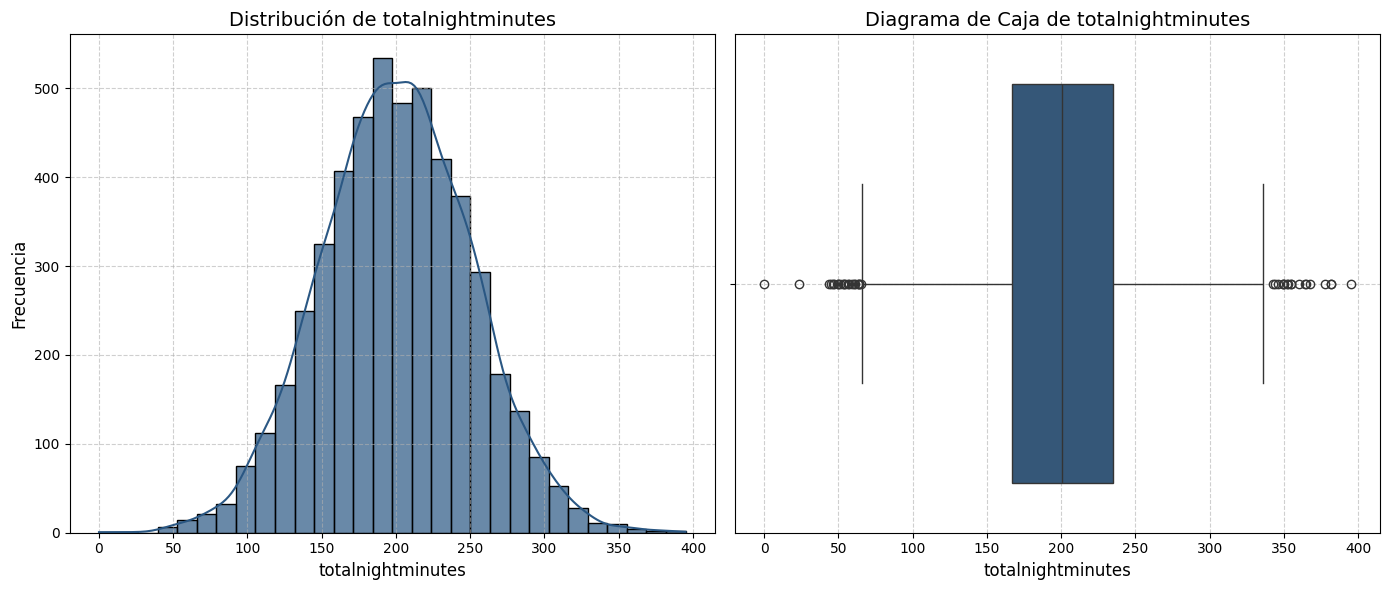

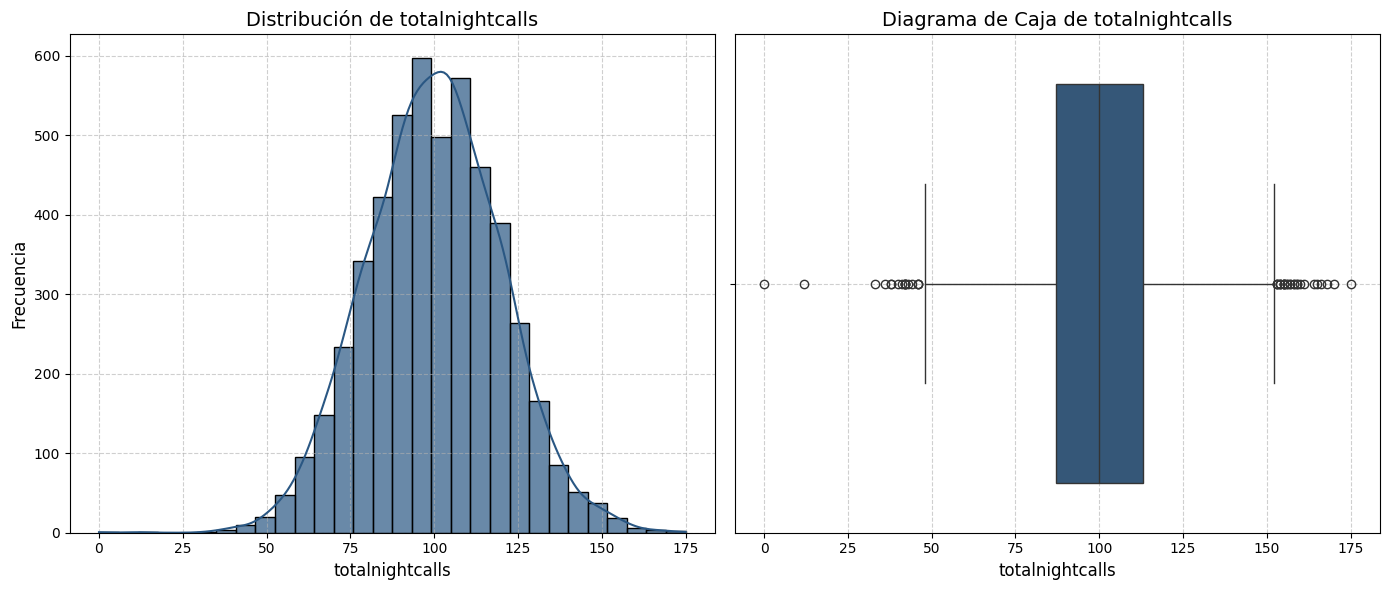

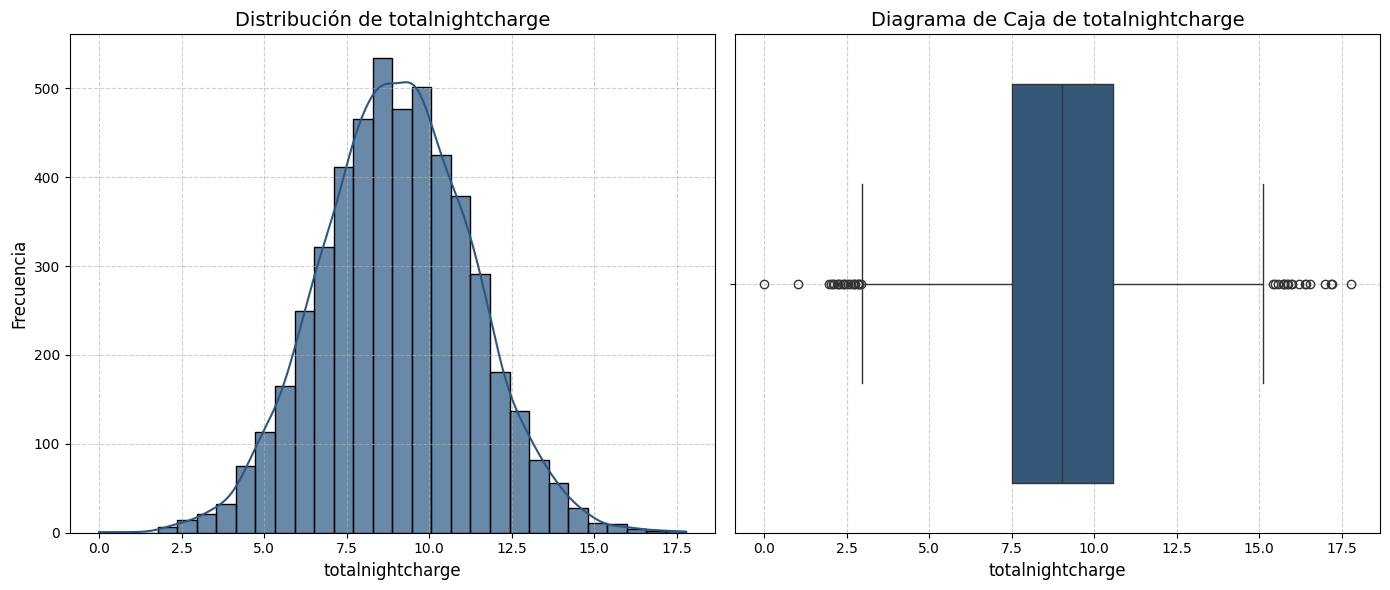

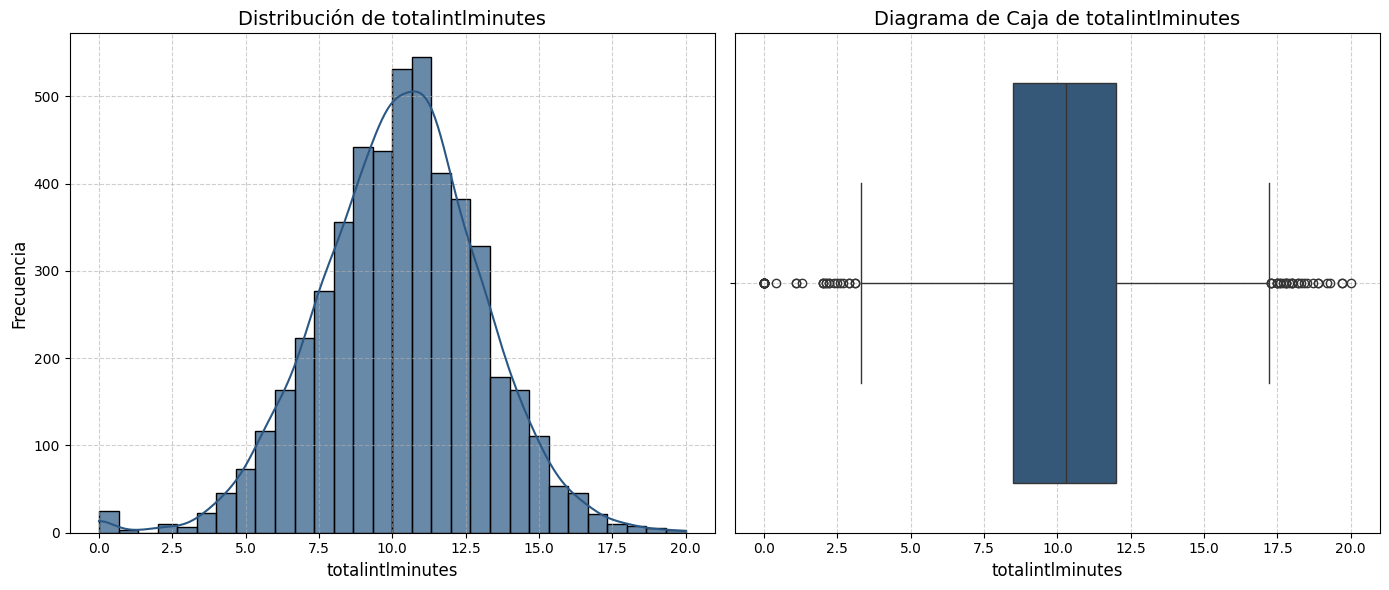

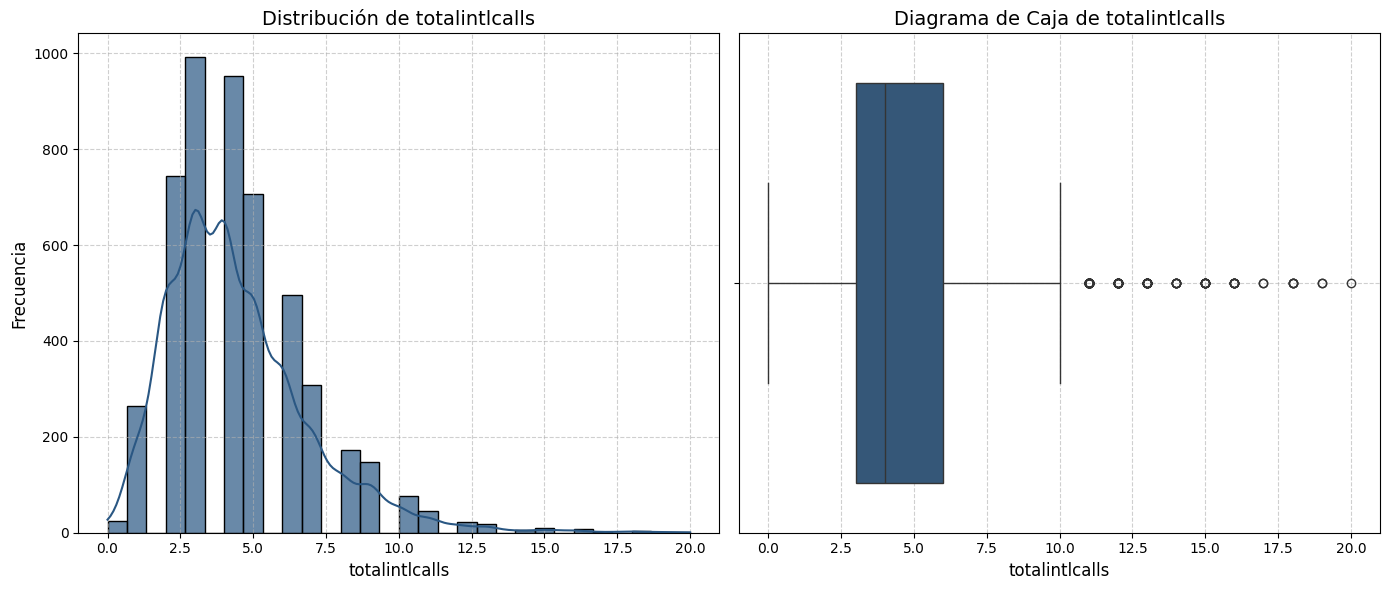

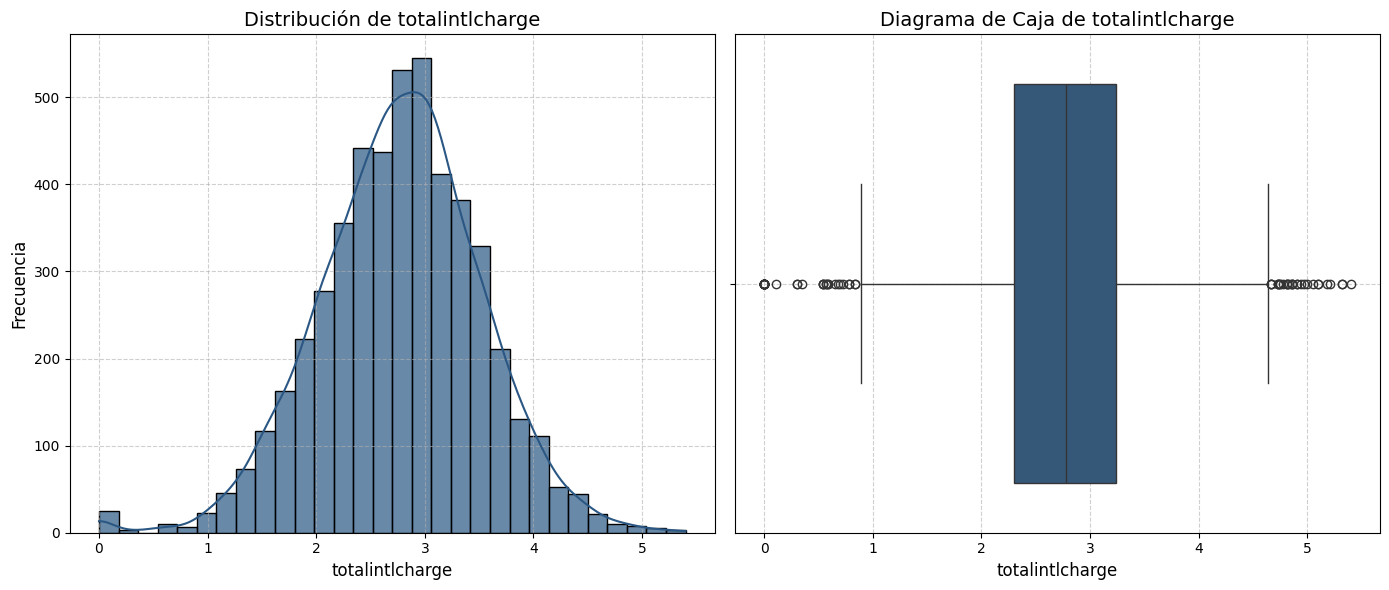

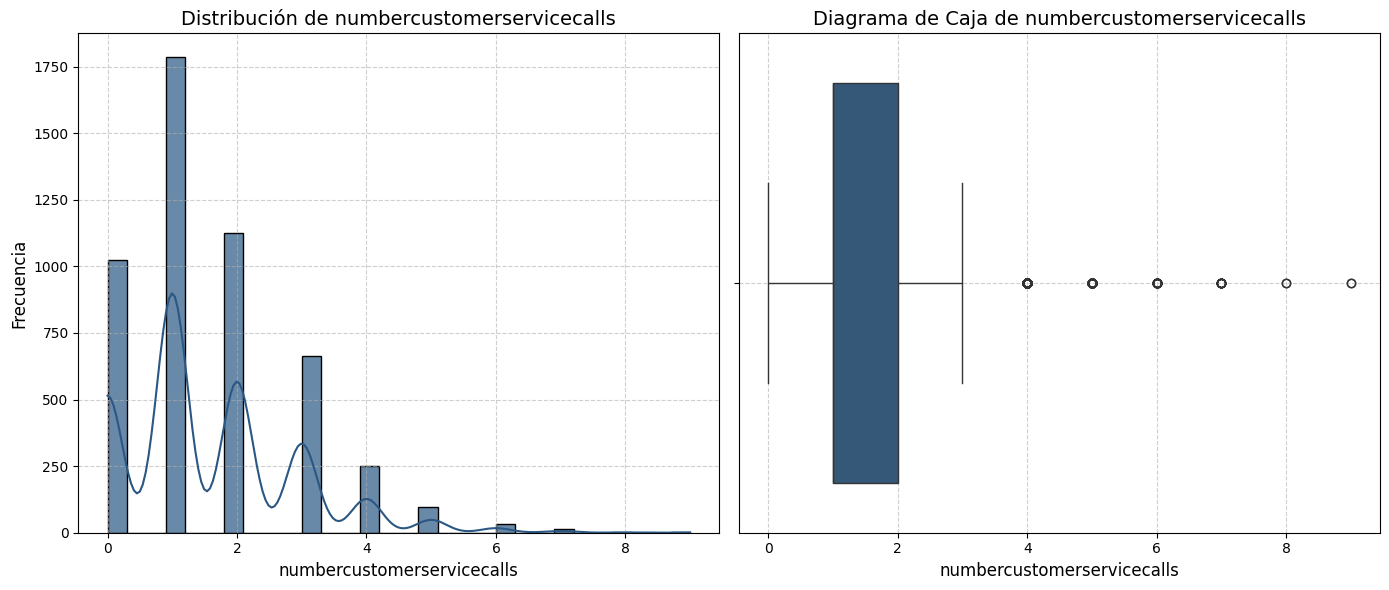

In [ ]:
def plot_distribution_and_boxplot(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in num_cols:
        plt.figure(figsize=(14, 6))

        # Histograma con KDE
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=30, color="#2A5783", alpha=0.7)
        plt.title(f"Distribución de {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Frecuencia", fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color="#2A5783")
        plt.title(f"Diagrama de Caja de {col}", fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)

        plt.tight_layout()
        plt.show()

plot_distribution_and_boxplot(df)

In [ ]:
# Comprobación de asimetría y normalidad
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    skewness = skew(df[col])
    kurt = kurtosis(df[col])
    print(f"{col}:")
    print(f"  Asimetría (Skewness): {skewness:.2f}")
    print(f"  Curtosis: {kurt:.2f}")

# FALTA GRÁFICO CAMPANA

accountlength:
  Asimetría (Skewness): 0.11
  Curtosis: -0.10
numbervmailmessages:
  Asimetría (Skewness): 1.35
  Curtosis: 0.20
totaldayminutes:
  Asimetría (Skewness): -0.01
  Curtosis: -0.02
totaldaycalls:
  Asimetría (Skewness): -0.08
  Curtosis: 0.18
totaldaycharge:
  Asimetría (Skewness): -0.01
  Curtosis: -0.02
totaleveminutes:
  Asimetría (Skewness): -0.01
  Curtosis: 0.05
totalevecalls:
  Asimetría (Skewness): -0.02
  Curtosis: 0.12
totalevecharge:
  Asimetría (Skewness): -0.01
  Curtosis: 0.05
totalnightminutes:
  Asimetría (Skewness): 0.02
  Curtosis: 0.08
totalnightcalls:
  Asimetría (Skewness): 0.00
  Curtosis: 0.14
totalnightcharge:
  Asimetría (Skewness): 0.02
  Curtosis: 0.08
totalintlminutes:
  Asimetría (Skewness): -0.21
  Curtosis: 0.65
totalintlcalls:
  Asimetría (Skewness): 1.36
  Curtosis: 3.26
totalintlcharge:
  Asimetría (Skewness): -0.21
  Curtosis: 0.65
numbercustomerservicecalls:
  Asimetría (Skewness): 1.04
  Curtosis: 1.48


## 4. Análisis bivariado

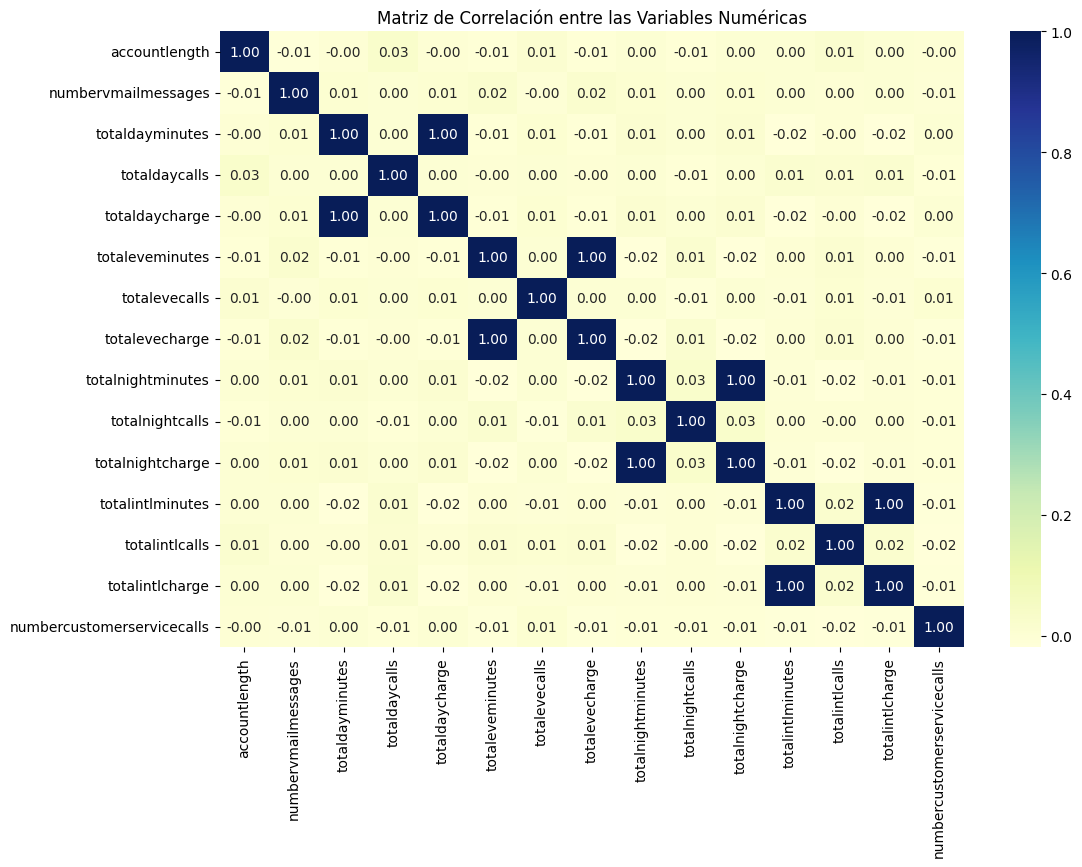

In [ ]:
# Matriz de correlación con mapa de calor utilizando matplotlib

# Filtrar solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Crear matriz de correlación con el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
plt.title("Matriz de Correlación entre las Variables Numéricas")
plt.show()

In [ ]:
# Función reutilizable para graficar la dispersión entre dos variables numéricas
def scatter_plot(df, column_x, column_y, title=None, color="#2A5783", alpha=0.7, trendline=True):
    # Validaciones de existencia de columnas
    if column_x not in df.columns:
        raise ValueError(f"La columna '{column_x}' no existe en el DataFrame.")
    if column_y not in df.columns:
        raise ValueError(f"La columna '{column_y}' no existe en el DataFrame.")

    # Generar el gráfico
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=column_x, y=column_y, color=color, alpha=alpha)

    if trendline:
        x = df[column_x]
        y = df[column_y]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        plt.plot(x, slope * x + intercept, color='red', label=f'Línea de tendencia (R²={r_value**2:.6f})')
        plt.legend()

    # Configuración del título y etiquetas
    plt.title(title if title else f"Gráfico de Dispersión: {column_y} vs {column_x}", fontsize=14)
    plt.xlabel(column_x, fontsize=12)
    plt.ylabel(column_y, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

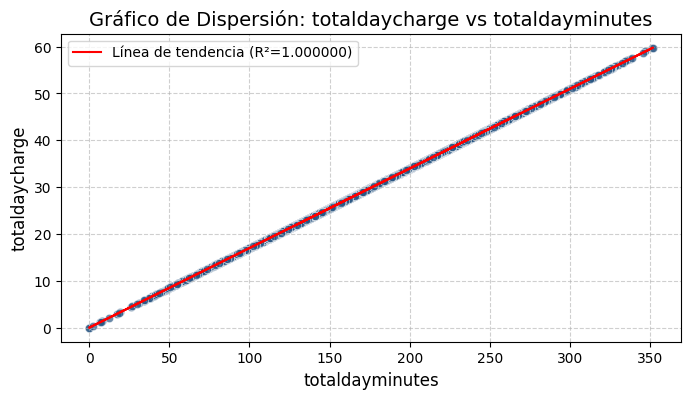

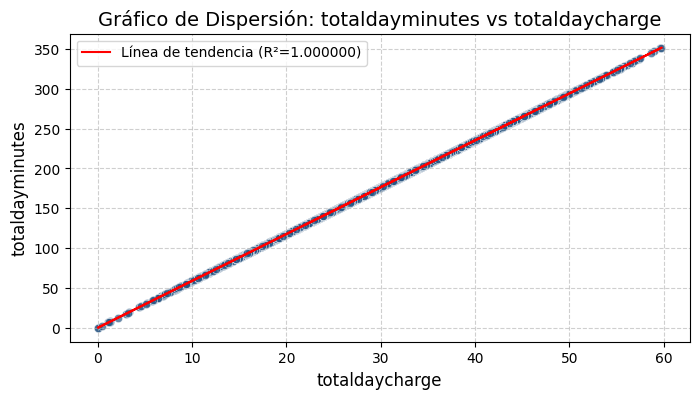

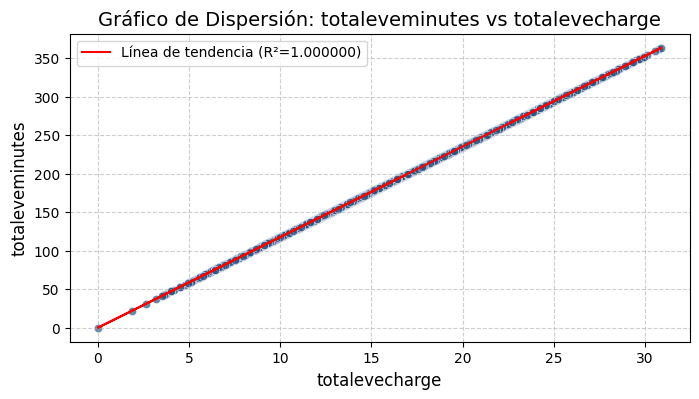

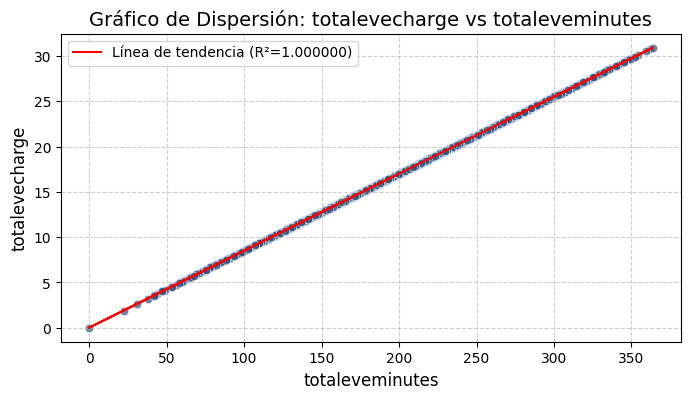

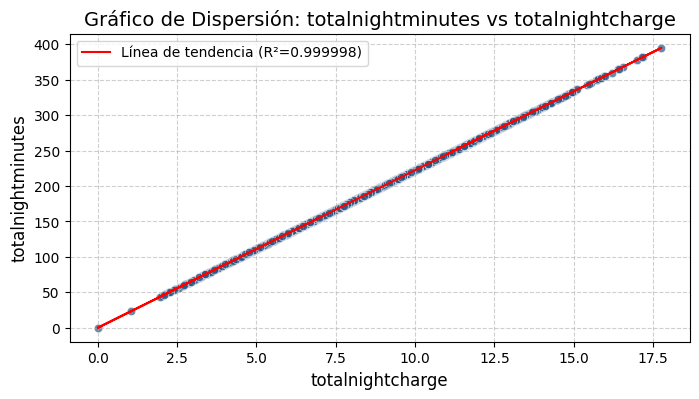

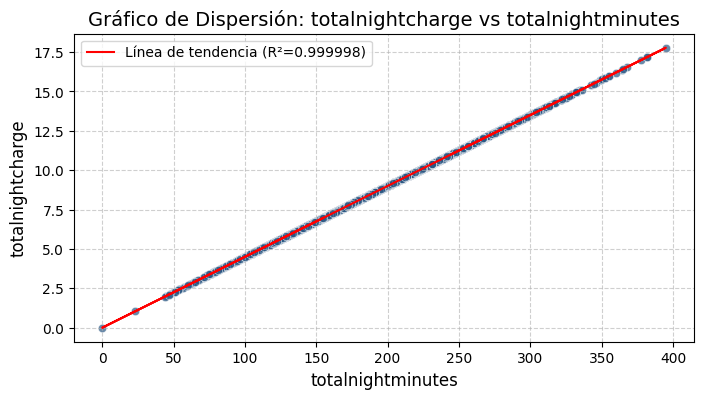

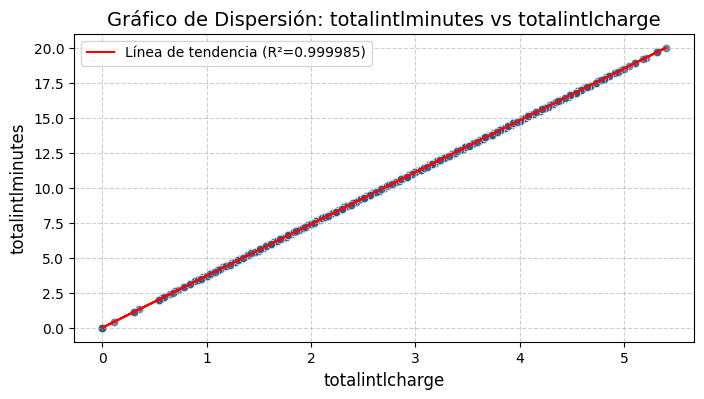

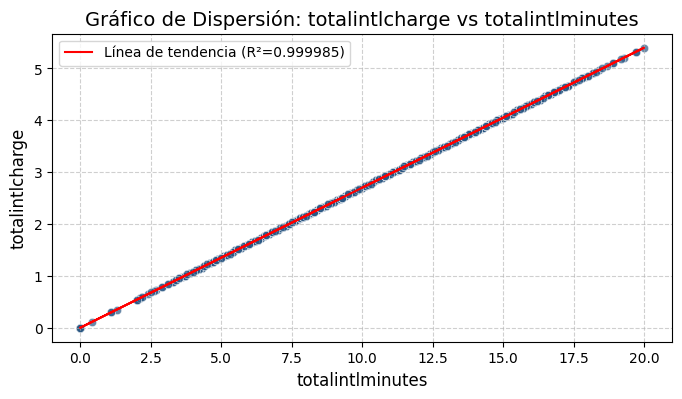

In [ ]:
# Obtener las relaciones entre las variables ordenadas de mayor a menor
pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filtrar las relaciones con mayor correlación y evitando duplicados
pairs = pairs[(pairs.index.get_level_values(0) != pairs.index.get_level_values(1))]

# Si se quisiera filtrar por algún nivel correlación (en este ejemplo es cuando la correlación es mayor de 0.5):
# relevant_pairs = relevant_pairs[(abs(relevant_pairs) > 0.5) & (relevant_pairs.index.get_level_values(0) != relevant_pairs.index.get_level_values(1))]

# Graficar los pares relavantes
for pair in pairs.index:
    scatter_plot(
        df=df,
        column_x=pair[0],
        column_y=pair[1],
    )


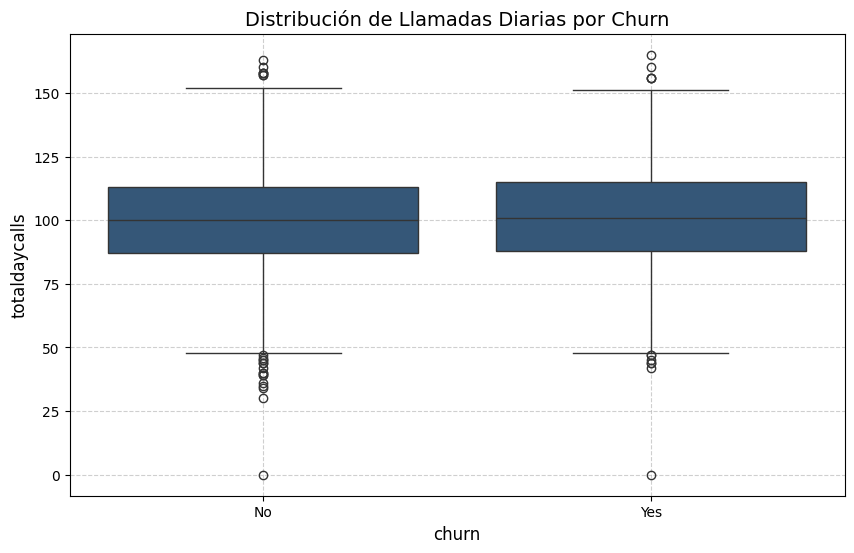

In [ ]:
# Función reutilizable para graficar boxplots para mostrar la distribución númerica entre las variables categoricas
def plot_boxplot(df, categorical_column, numerical_column, title=None, color="#2A5783", orient="v"):
    # Validaciones de existencia de columnas
    if categorical_column not in df.columns:
        raise ValueError(f"La columna categórica '{categorical_column}' no existe en el DataFrame.")
    if numerical_column not in df.columns:
        raise ValueError(f"La columna numérica '{numerical_column}' no existe en el DataFrame.")

    # Generar el gráfico
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x=categorical_column if orient == "v" else numerical_column,
        y=numerical_column if orient == "v" else categorical_column,
        color=color
    )
    plt.title(title if title else f"Boxplot de {numerical_column} por {categorical_column}", fontsize=14)
    plt.xlabel(categorical_column if orient == "v" else numerical_column, fontsize=12)
    plt.ylabel(numerical_column if orient == "v" else categorical_column, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Hacer los boxplot con las tres variables categoricas
categorical_cols = df.select_dtypes(include='string').columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plot_boxplot(
            df=df,
            categorical_column=cat_col,
            numerical_column=num_col
        )

## 5. Análisis de distribuciones y sesgos



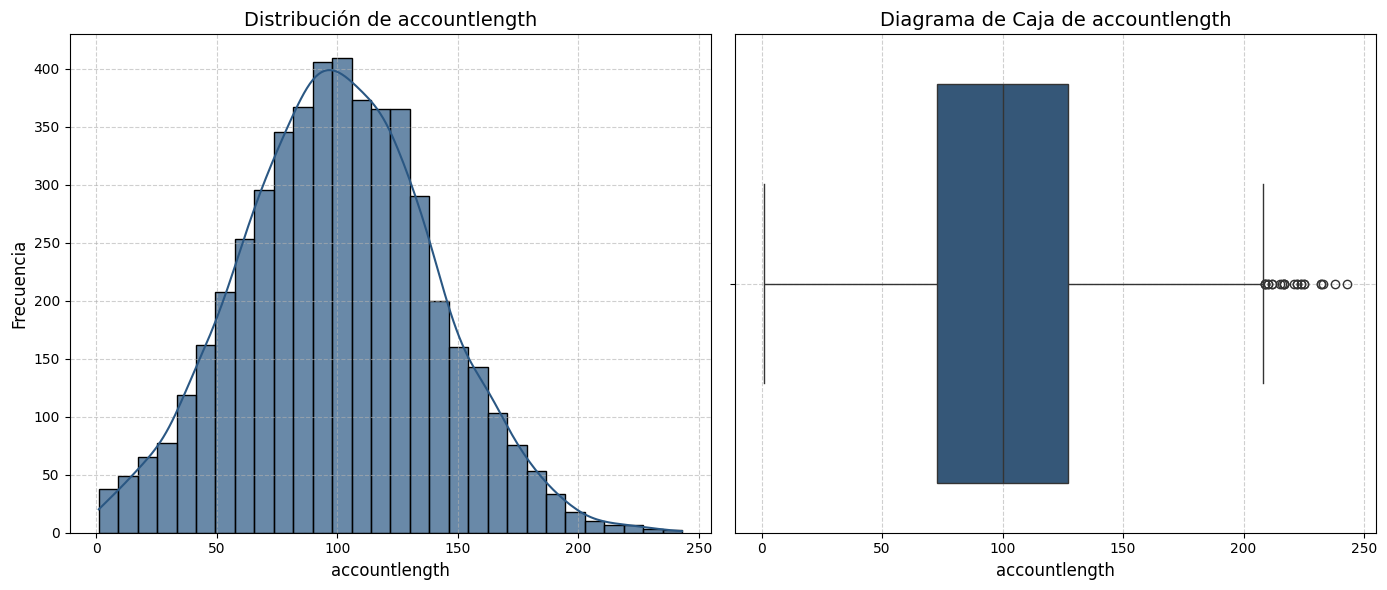

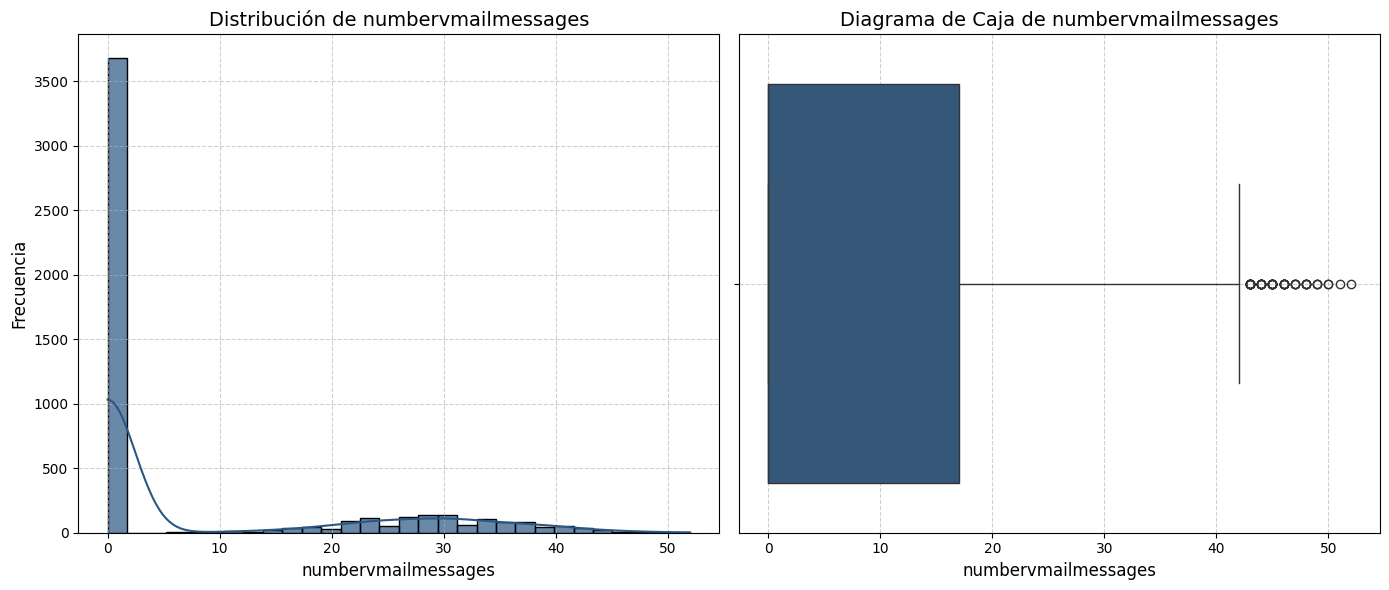

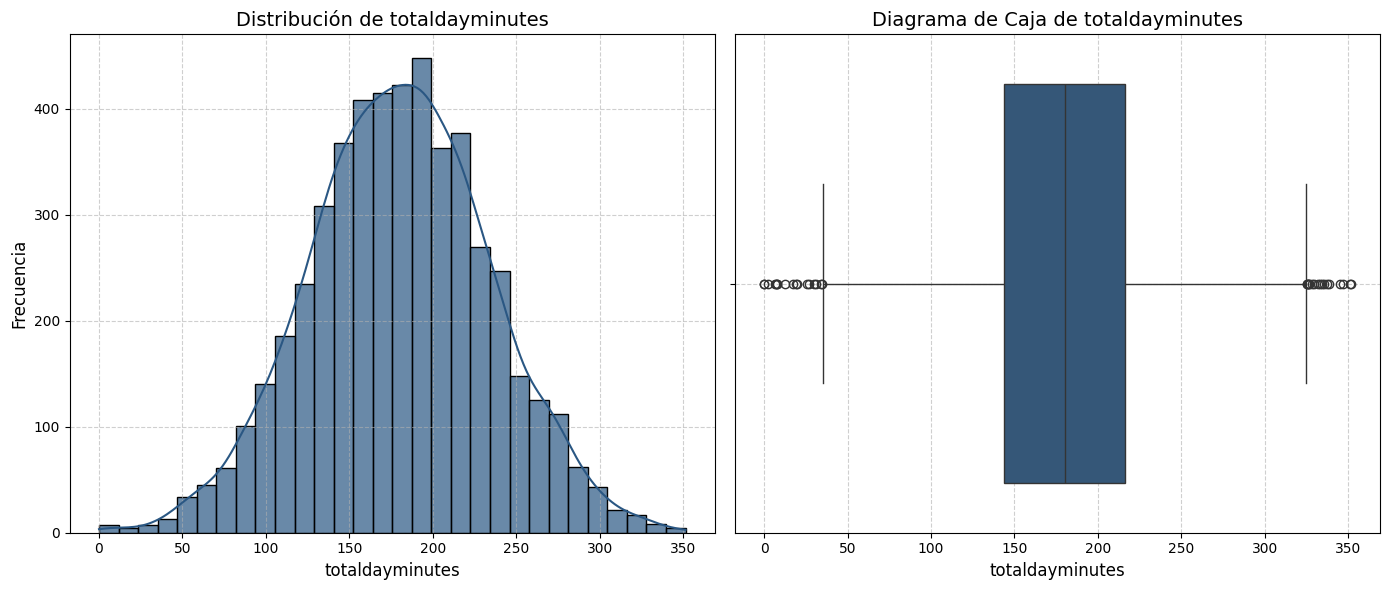

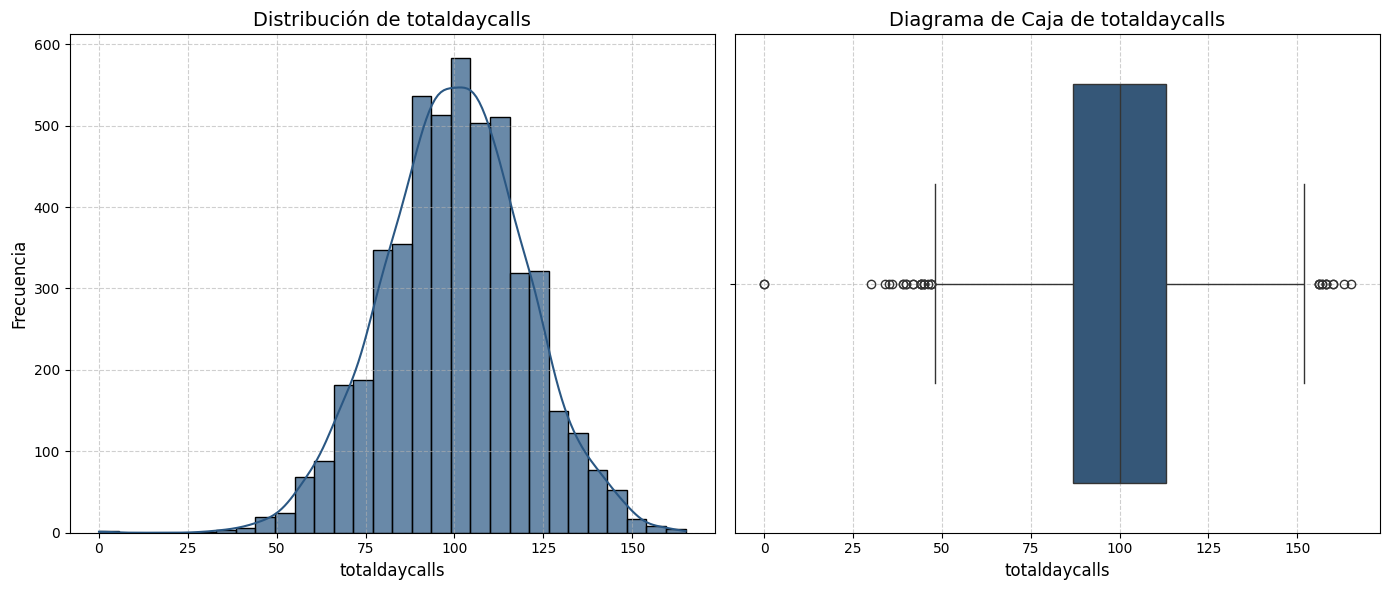

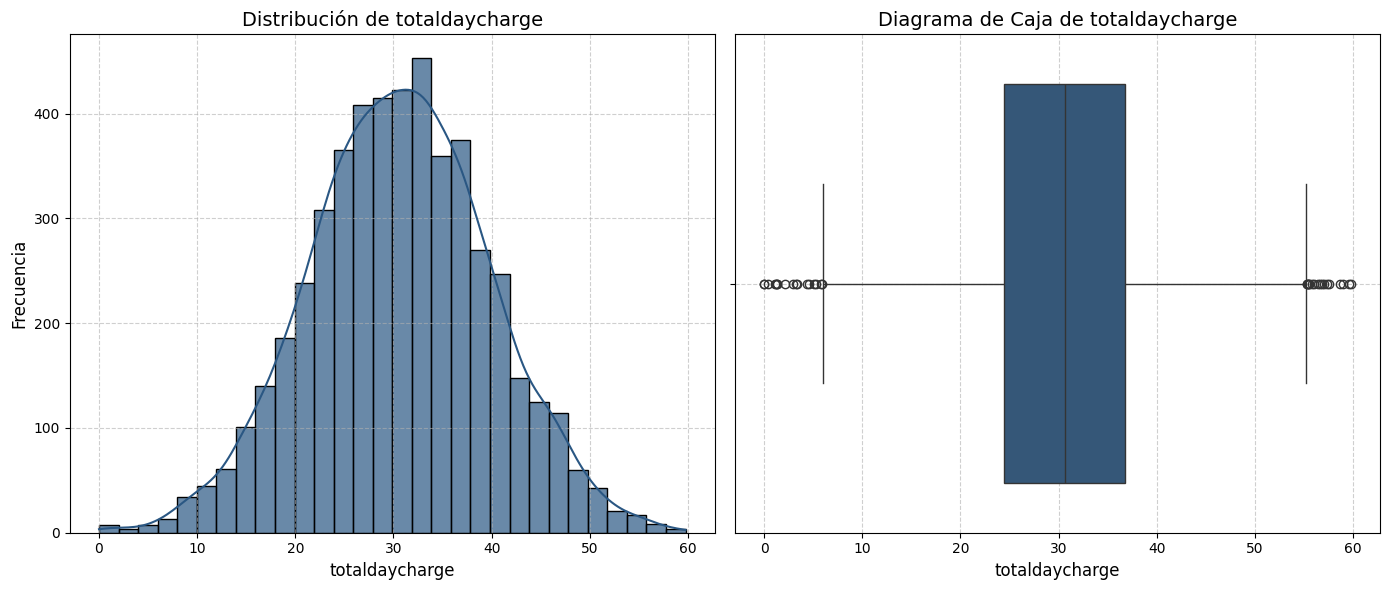

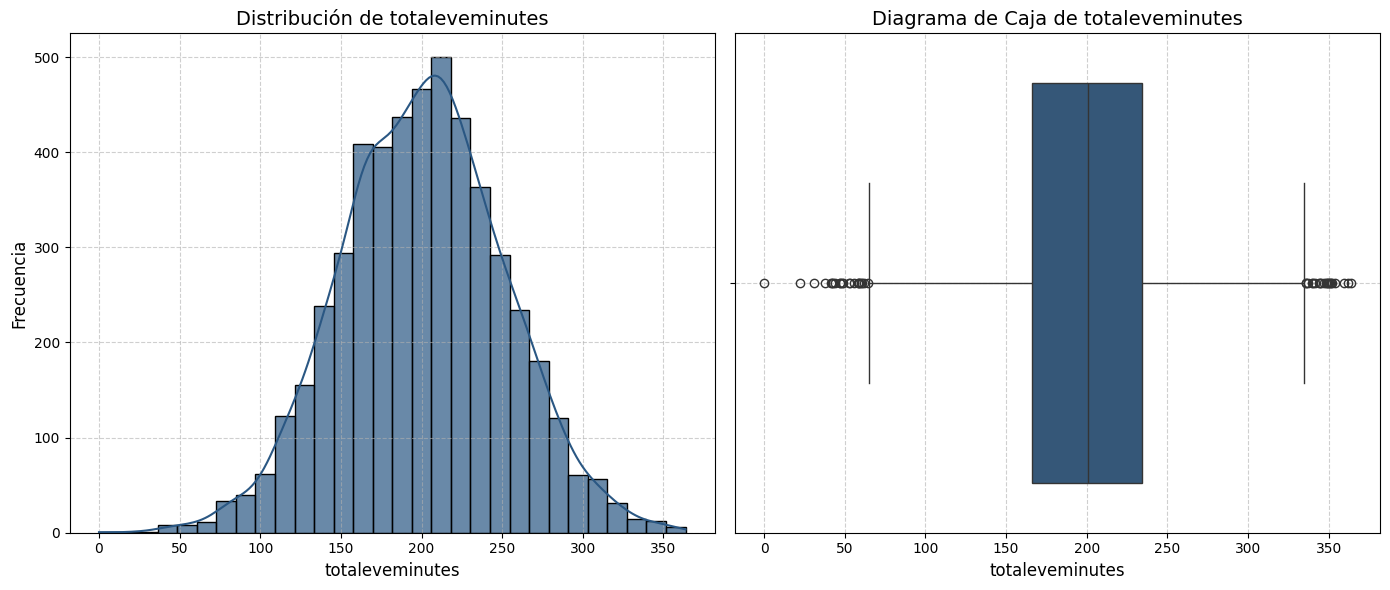

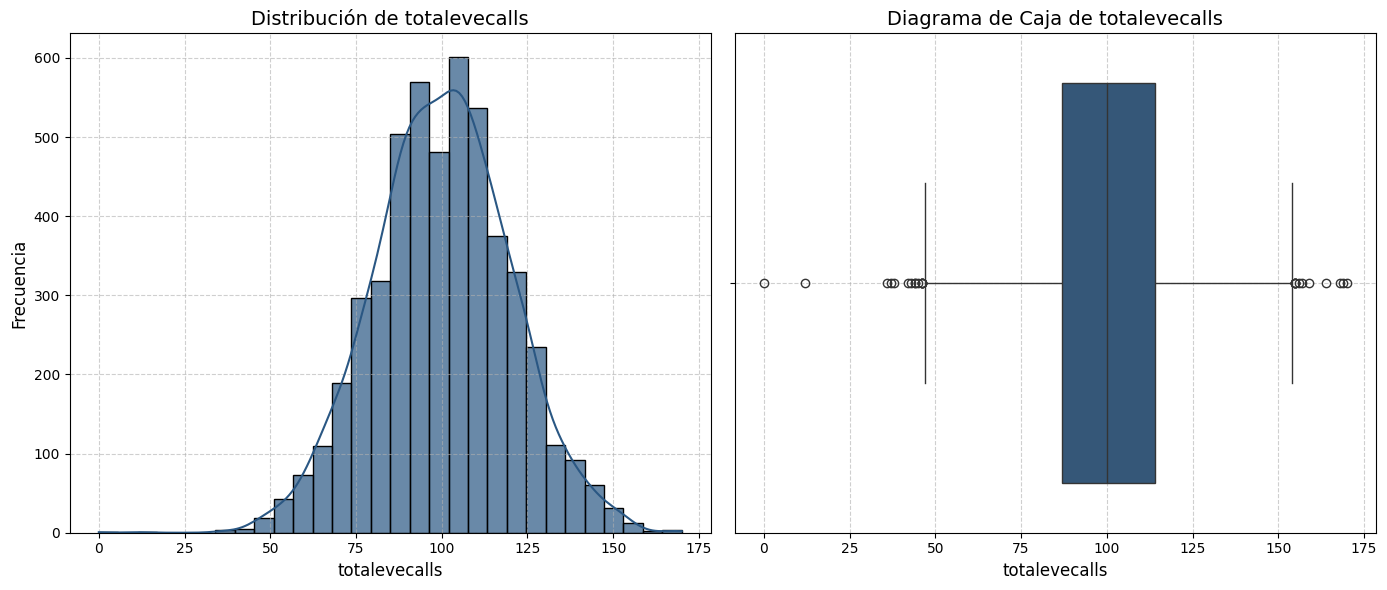

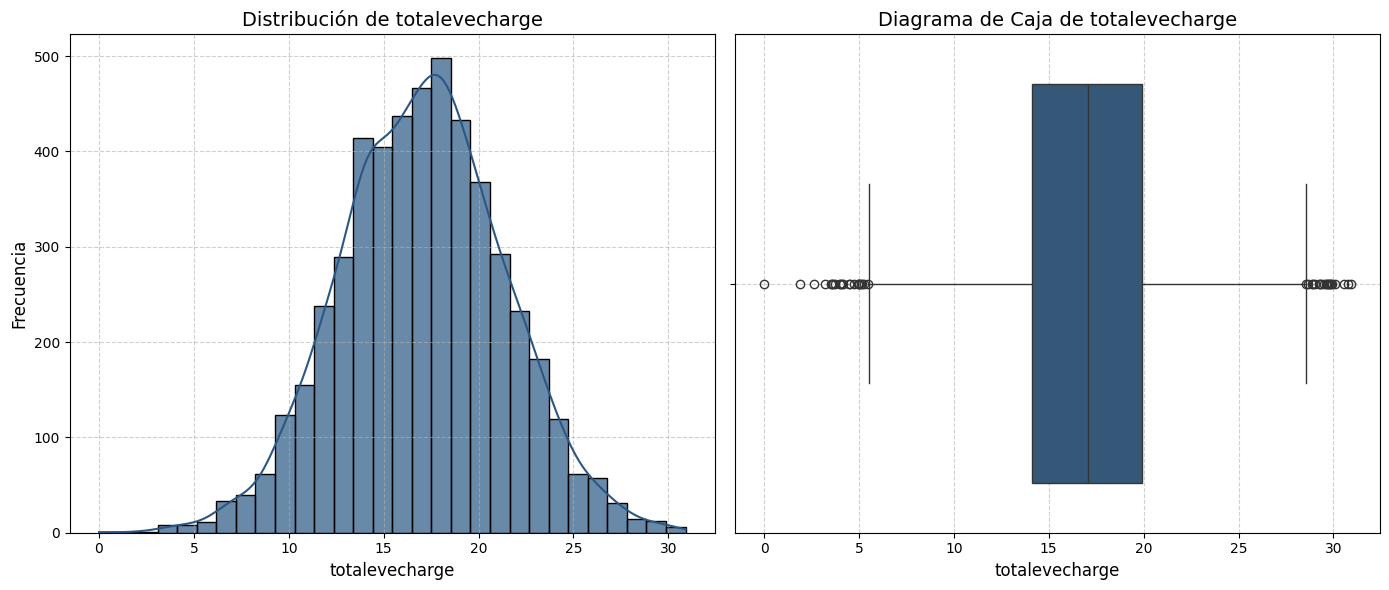

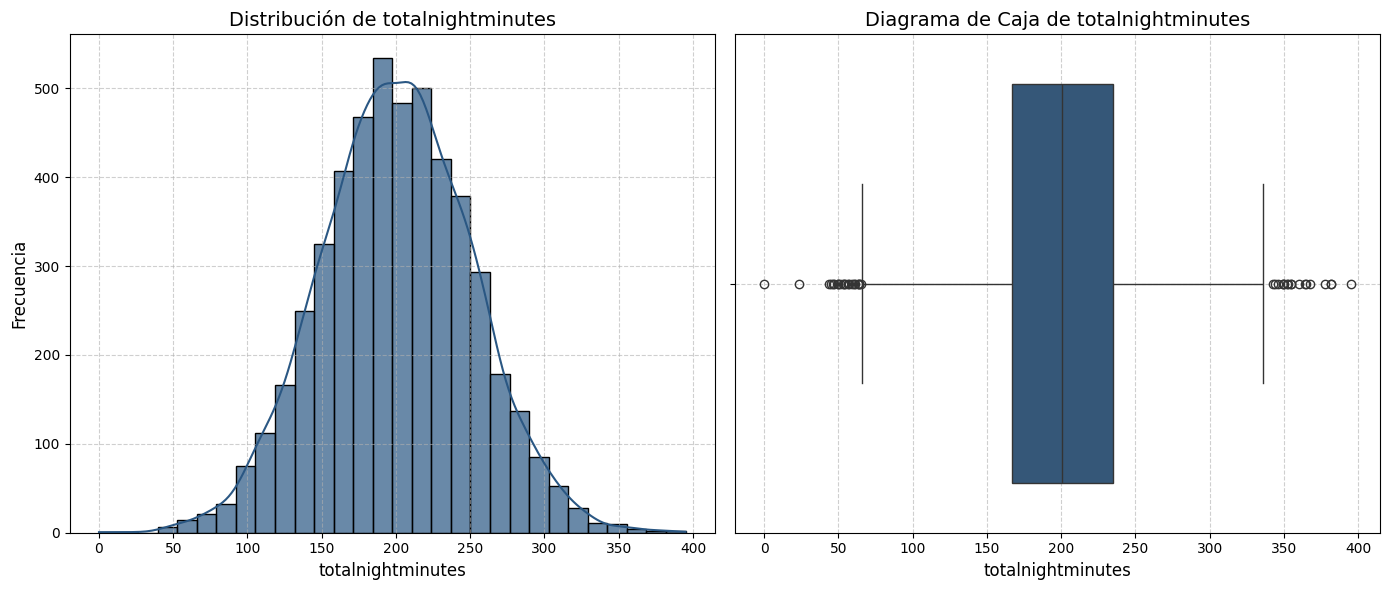

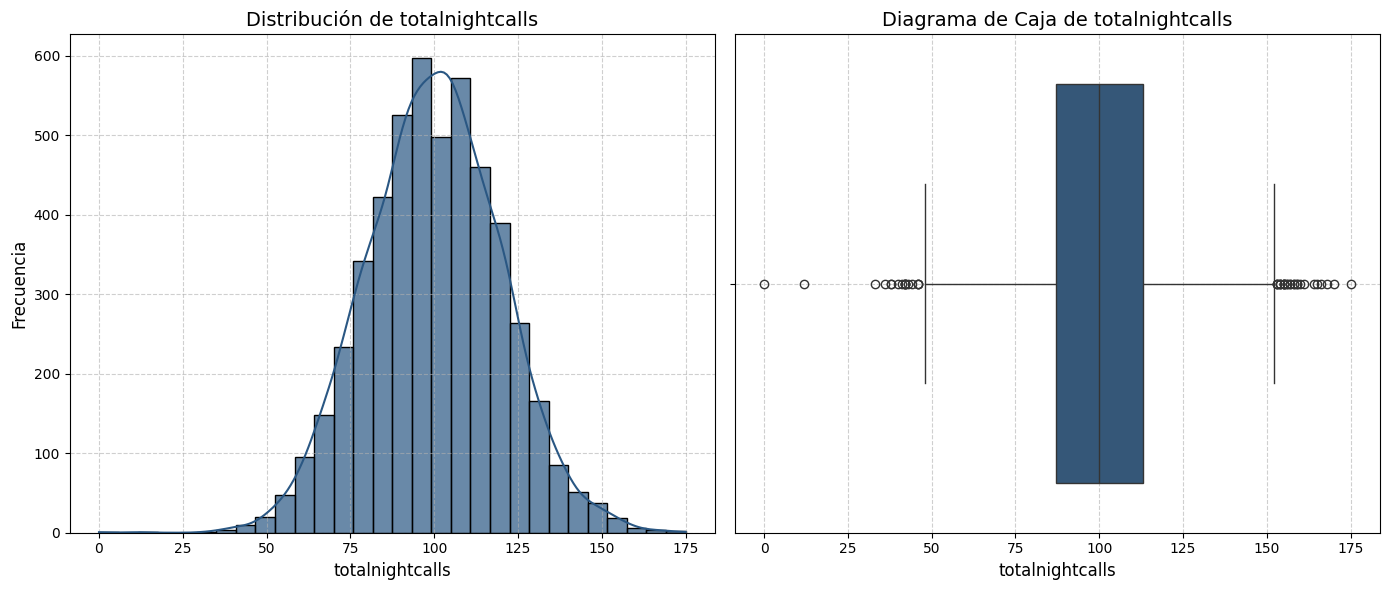

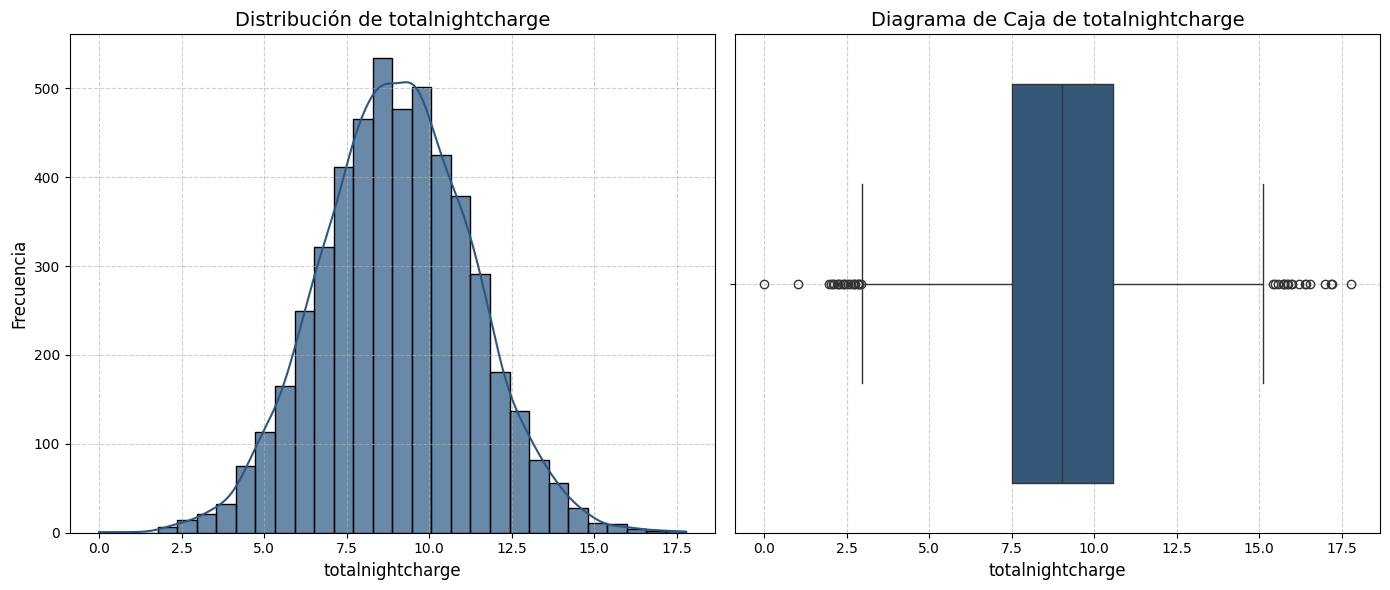

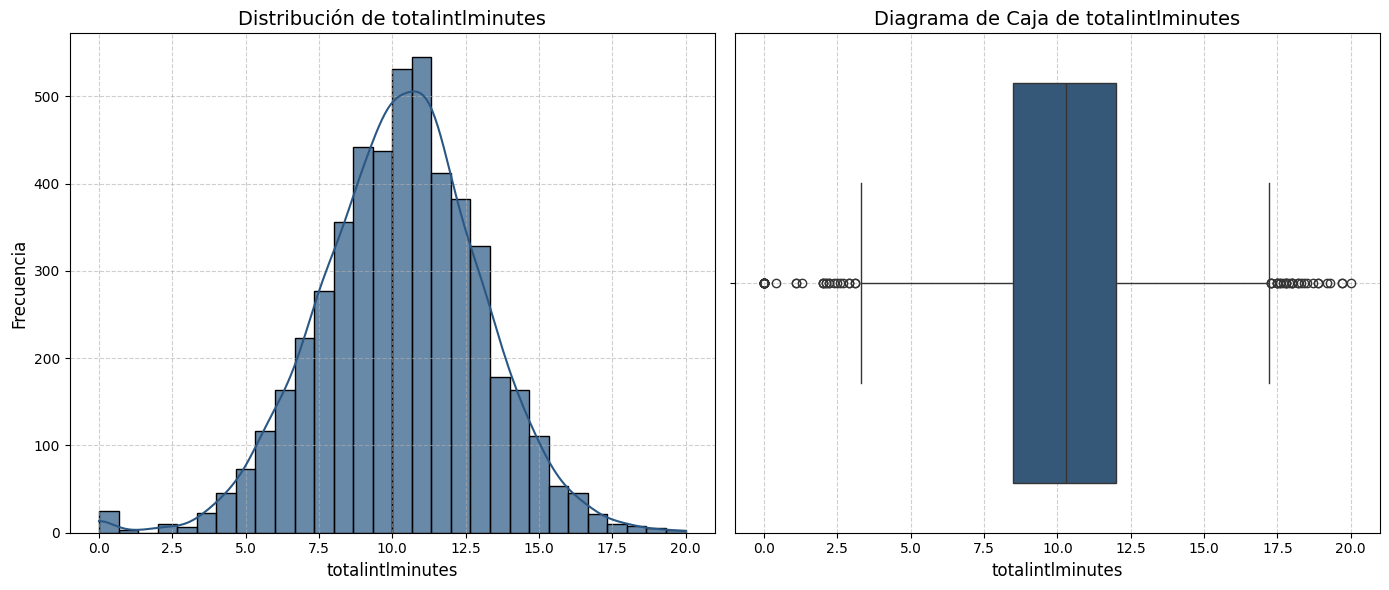

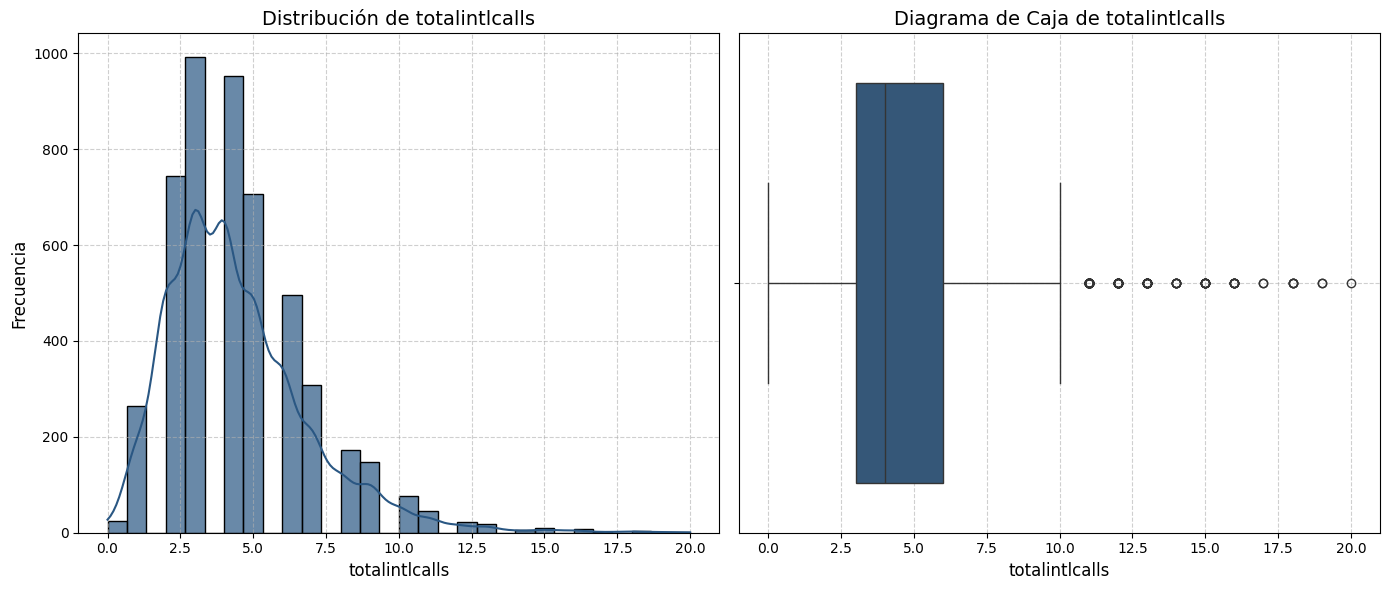

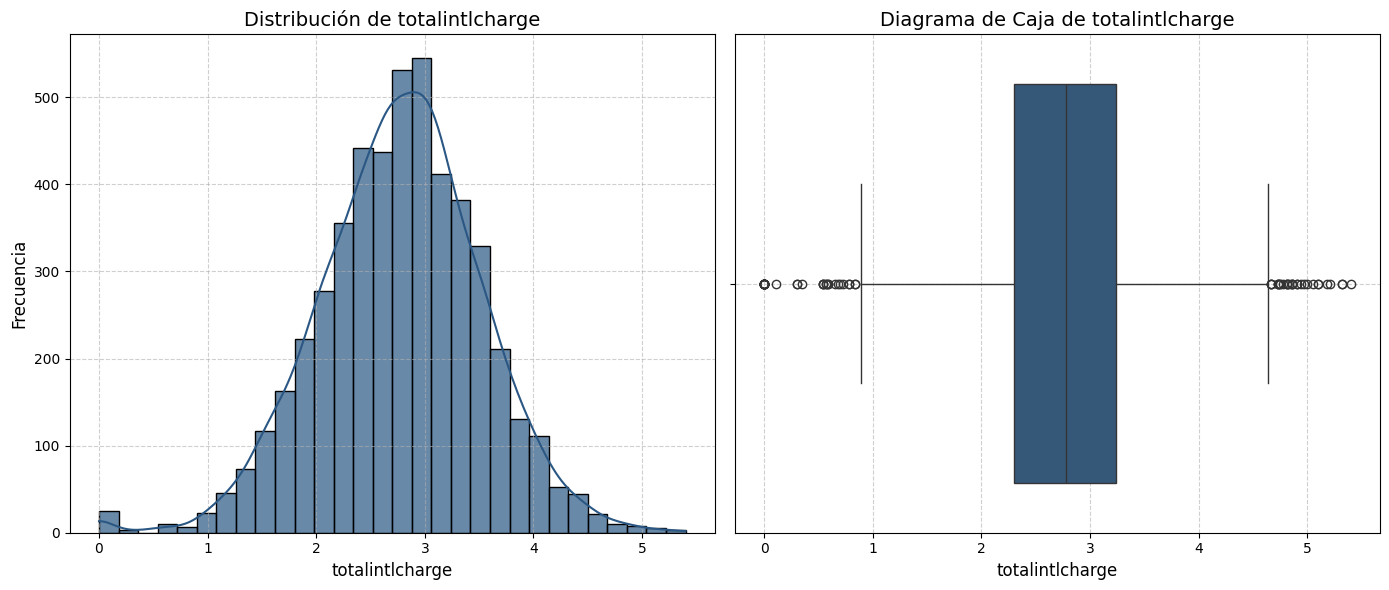

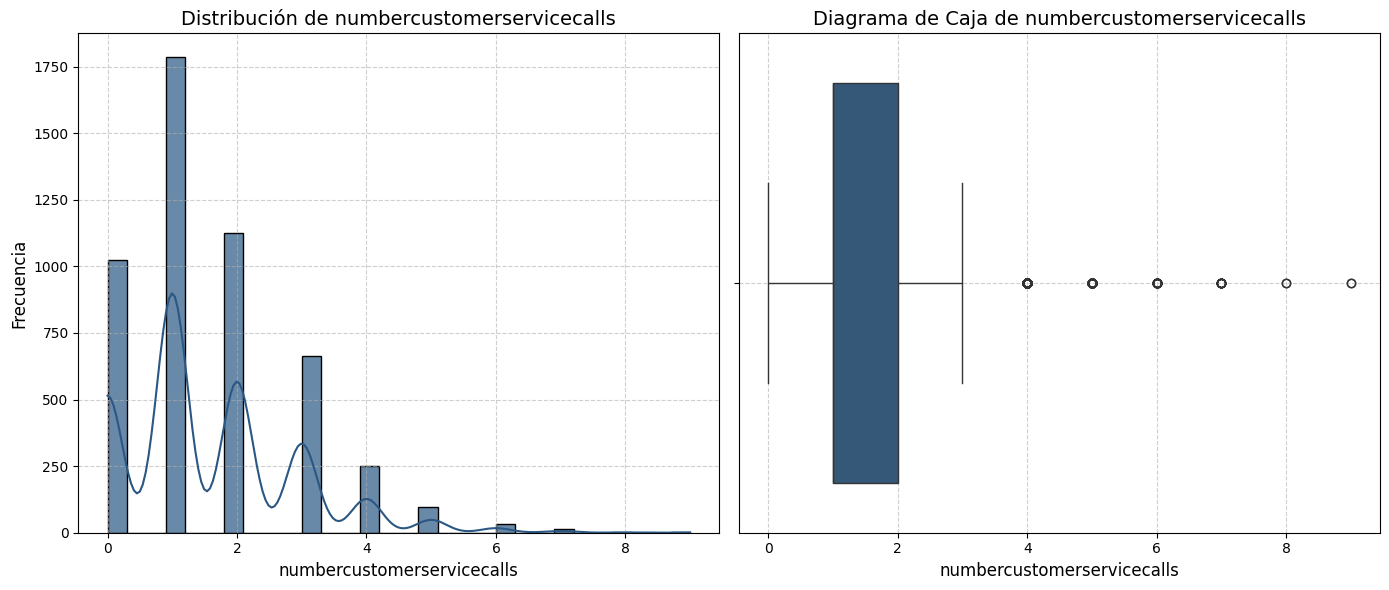

In [ ]:
# Comprobación de sesgo en los datos

# Obtener los diagramas de caja y distribuciones de las variables númericas
plot_distribution_and_boxplot(df)

In [ ]:
# Transformaciones de variables

# Medir la asimetria de los datos para identificar el sesgo
def calculate_skewness(df):
    skewness_vars = {col: skew(df[col].dropna()) for col in numeric_cols}

    # Imprimir resultados
    for col, skewness in skewness_vars.items():
        print(f"Variable: {col}, Sesgo: {skewness:.2f}")

    return skewness_vars

skewness_variables = calculate_skewness(df)

Variable: accountlength, Sesgo: 0.11
Variable: numbervmailmessages, Sesgo: 1.35
Variable: totaldayminutes, Sesgo: -0.01
Variable: totaldaycalls, Sesgo: -0.08
Variable: totaldaycharge, Sesgo: -0.01
Variable: totaleveminutes, Sesgo: -0.01
Variable: totalevecalls, Sesgo: -0.02
Variable: totalevecharge, Sesgo: -0.01
Variable: totalnightminutes, Sesgo: 0.02
Variable: totalnightcalls, Sesgo: 0.00
Variable: totalnightcharge, Sesgo: 0.02
Variable: totalintlminutes, Sesgo: -0.21
Variable: totalintlcalls, Sesgo: 1.36
Variable: totalintlcharge, Sesgo: -0.21
Variable: numbercustomerservicecalls, Sesgo: 1.04


In [ ]:
# Función para transformar las varaiables identificando las variables sesgadas según el umbral
def transform_skewed_variables(df, skewness_variables, threshold=1.0):
    new_df = df.copy()

    for col, skewness in skewness_variables.items():
        # Aplicar transformación si el sesgo excede el umbral
        if abs(skewness) > threshold:
            if new_df[col].min() > 0:  # Usar logaritmo si todos los valores son positivos
                new_df[col] = np.log(new_df[col])
                print(f"  -> Transformada {col} con logaritmo. Sesgo original: {skewness:.2f}")
            else:  # Usar raíz cuadrada si hay valores no positivos
                new_df[col] = np.sqrt(new_df[col] - new_df[col].min() + 1)
                print(f"  -> Transformada {col} con raíz cuadrada. Sesgo original: {skewness:.2f}")
    return new_df

# Obtener dataframe con las variables transformadas
df_transformed = transform_skewed_variables(df, skewness_variables)

# Calcular nuevamente el sesgo para mostrarlo
skewness_transformed = calculate_skewness(df_transformed)

  -> Transformada numbervmailmessages con raíz cuadrada. Sesgo original: 1.35
  -> Transformada totalintlcalls con raíz cuadrada. Sesgo original: 1.36
  -> Transformada numbercustomerservicecalls con raíz cuadrada. Sesgo original: 1.04
Variable: accountlength, Sesgo: 0.11
Variable: numbervmailmessages, Sesgo: 1.18
Variable: totaldayminutes, Sesgo: -0.01
Variable: totaldaycalls, Sesgo: -0.08
Variable: totaldaycharge, Sesgo: -0.01
Variable: totaleveminutes, Sesgo: -0.01
Variable: totalevecalls, Sesgo: -0.02
Variable: totalevecharge, Sesgo: -0.01
Variable: totalnightminutes, Sesgo: 0.02
Variable: totalnightcalls, Sesgo: 0.00
Variable: totalnightcharge, Sesgo: 0.02
Variable: totalintlminutes, Sesgo: -0.21
Variable: totalintlcalls, Sesgo: 0.57
Variable: totalintlcharge, Sesgo: -0.21
Variable: numbercustomerservicecalls, Sesgo: 0.39


## 6. Detección de valores atípicos


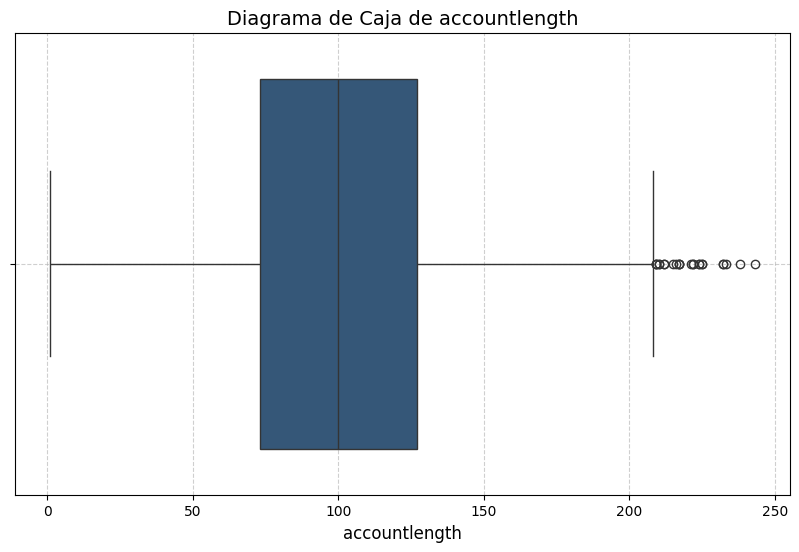

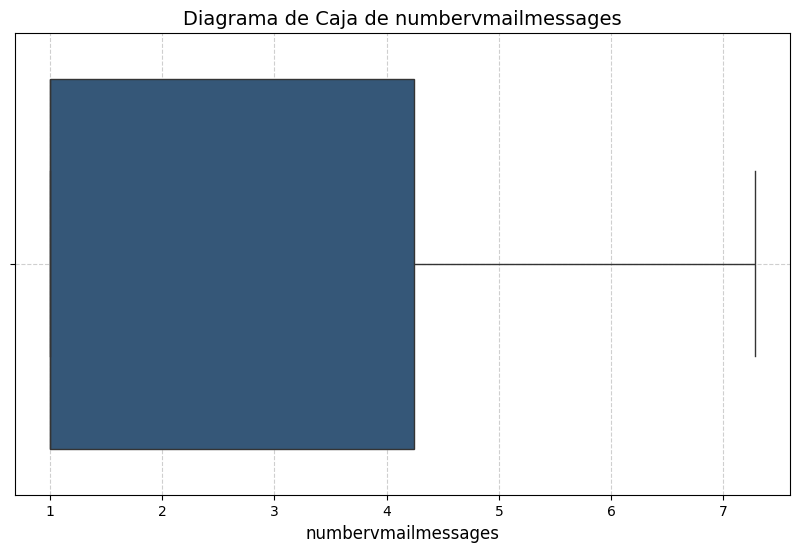

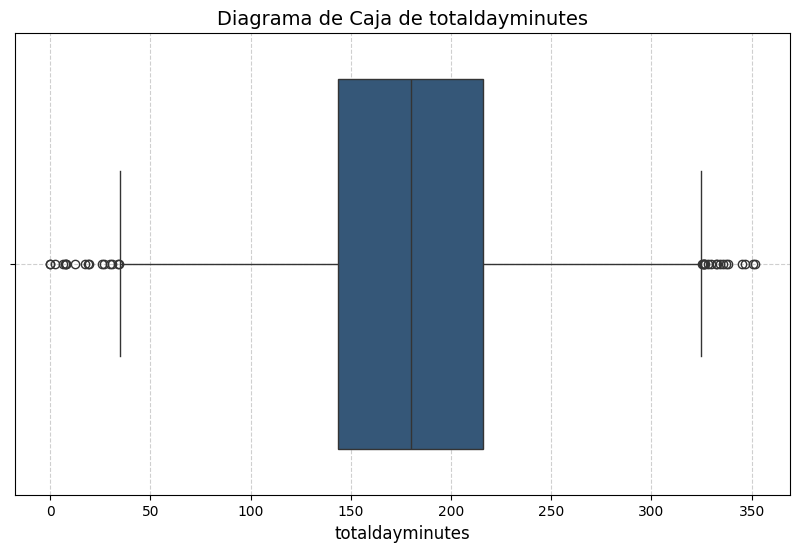

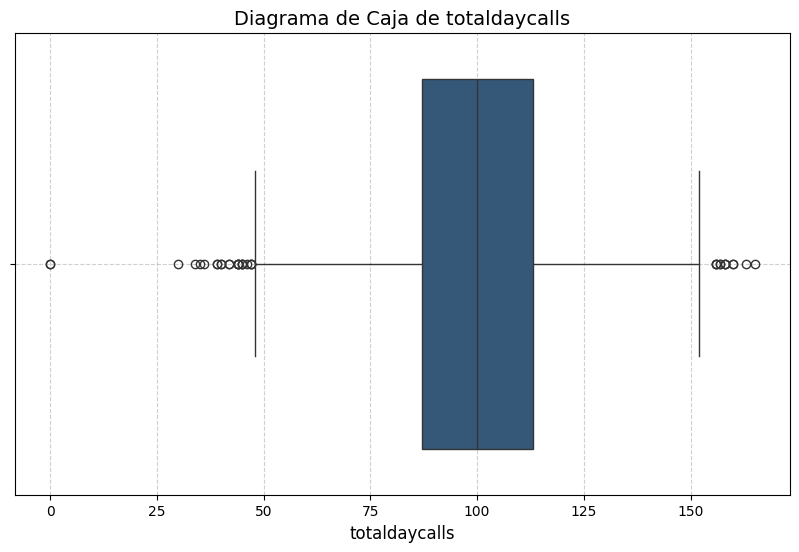

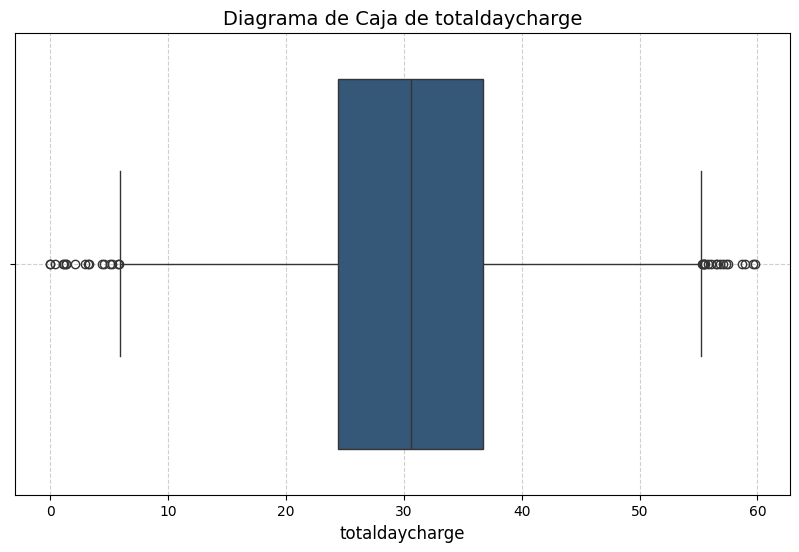

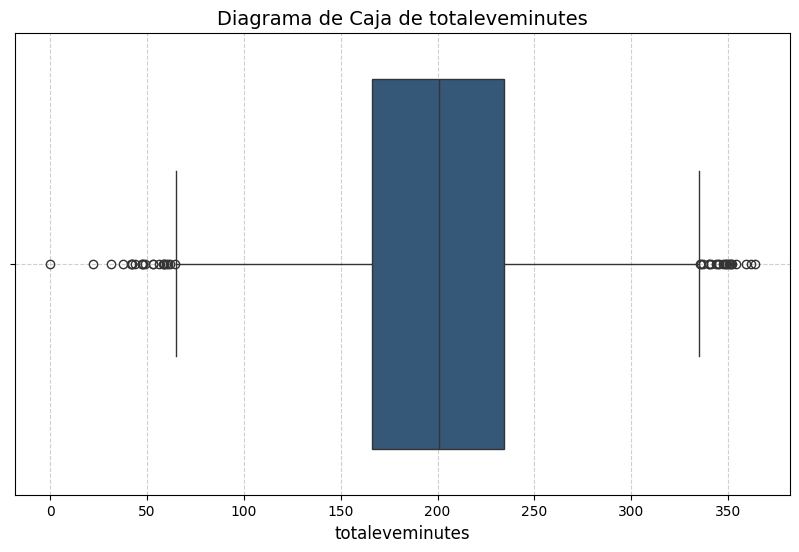

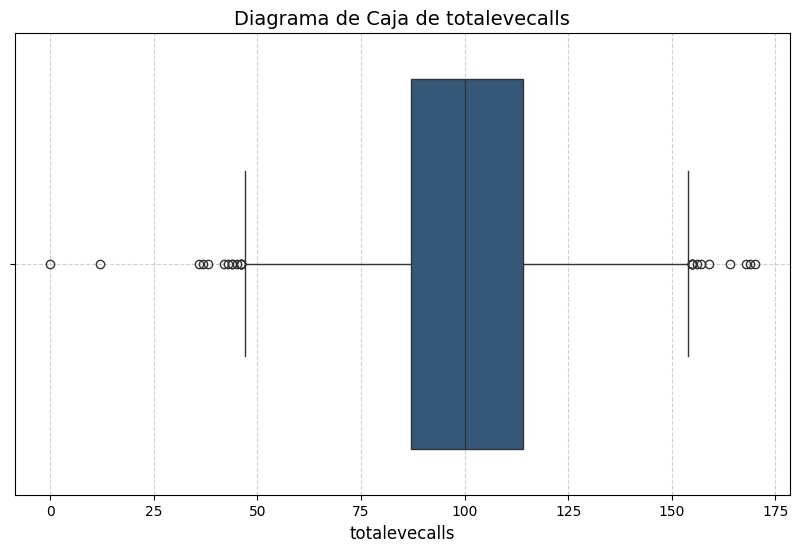

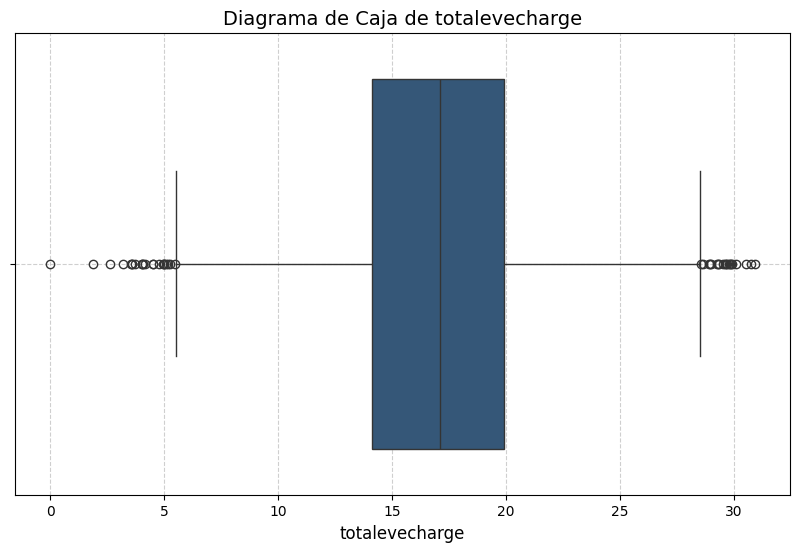

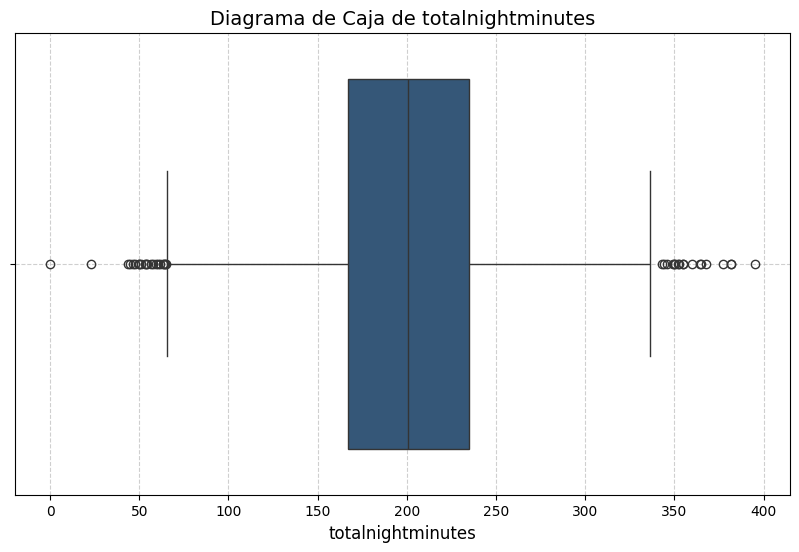

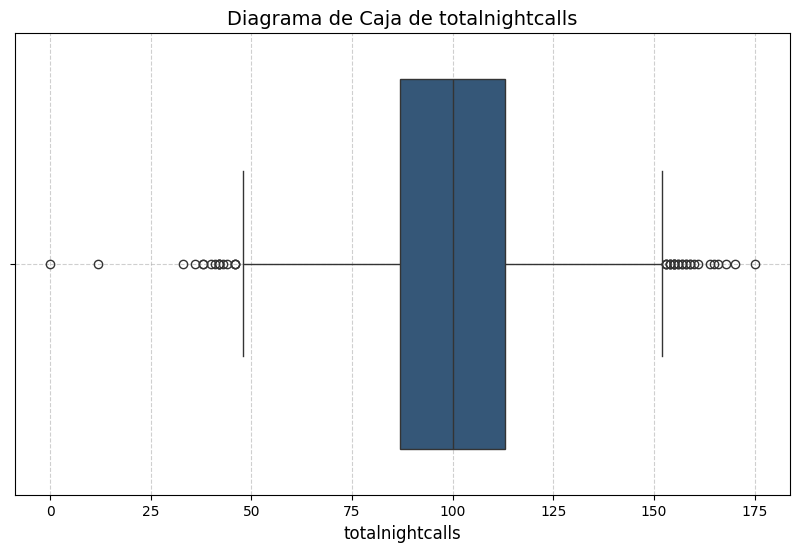

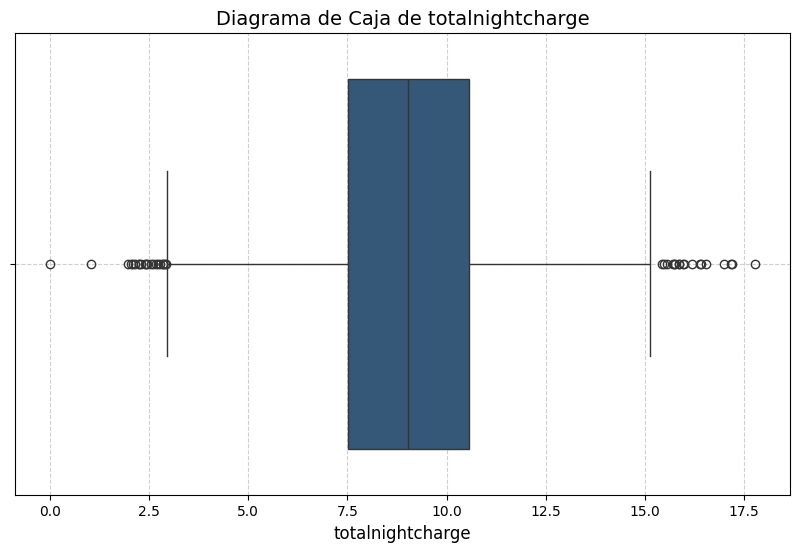

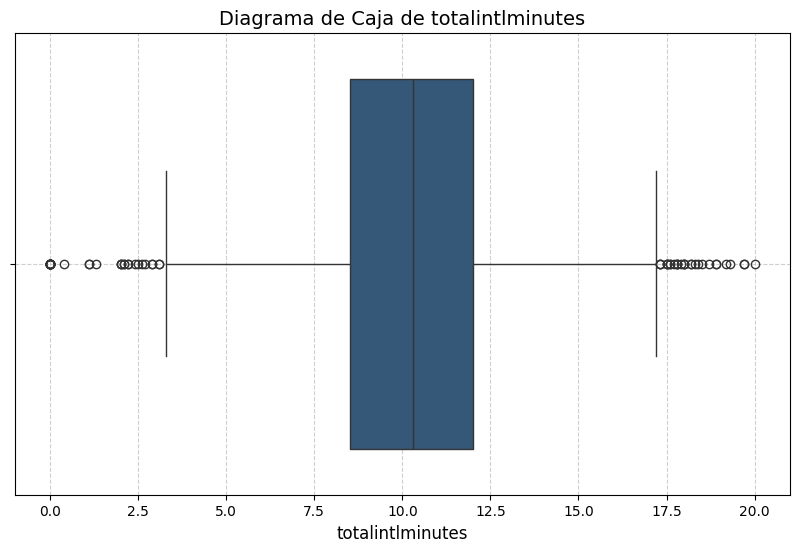

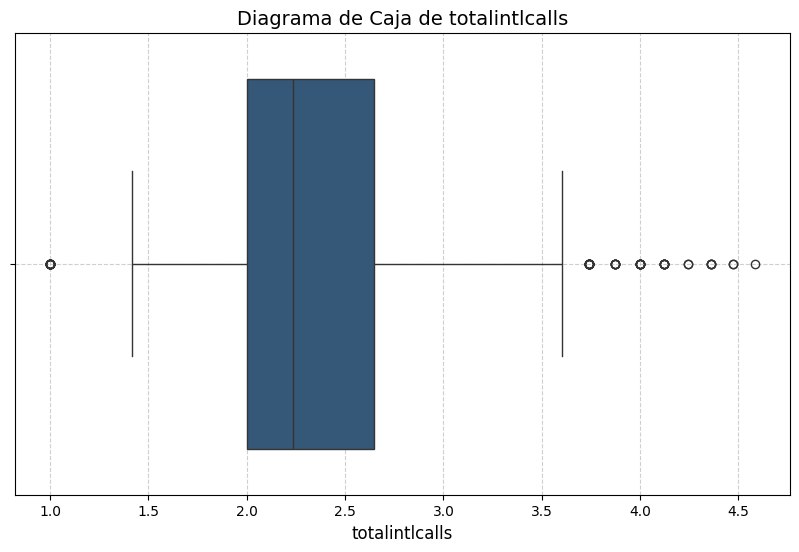

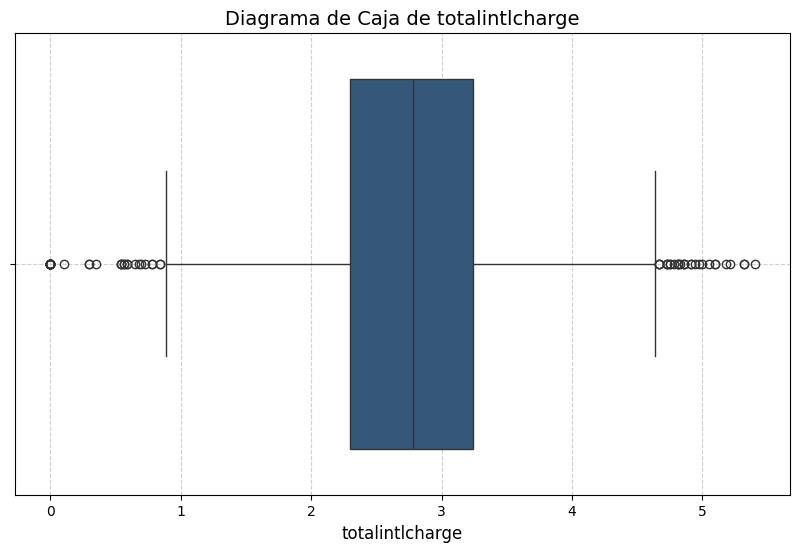

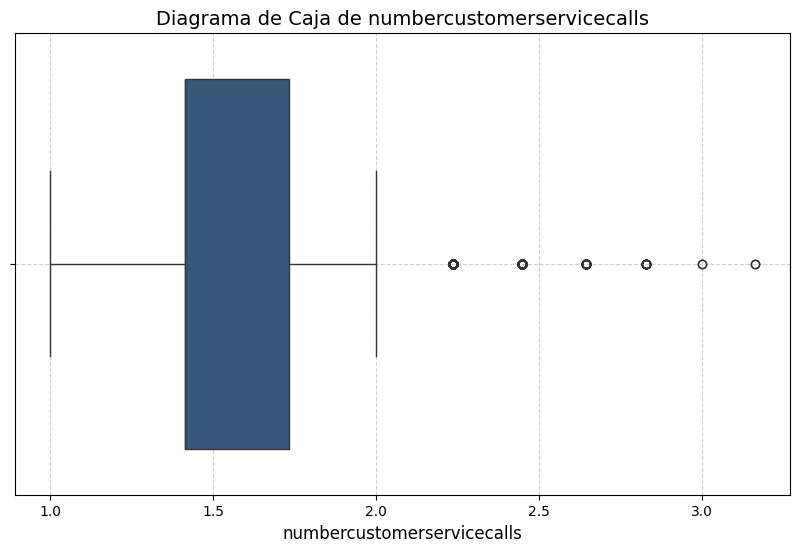

In [ ]:
# Boxplots para detectar valores
def plot_boxplot(column_data, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_data, color="#2A5783")
    plt.title(f"Diagrama de Caja de {column_name}", fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

for col in numeric_cols:
    plot_boxplot(df_transformed[col], col)


Resumen estadístico para totaldayminutes:
- Primer cuartil (Q1): 143.7
- Tercer cuartil (Q3): 216.2
- Rango intercuartílico (IQR): 72.5
- Mediana: 180.1
- Valor mínimo: 0.0
- Valor máximo: 351.5


Resumen estadístico para totaldaycalls:
- Primer cuartil (Q1): 87.0
- Tercer cuartil (Q3): 113.0
- Rango intercuartílico (IQR): 26.0
- Mediana: 100.0
- Valor mínimo: 0
- Valor máximo: 165



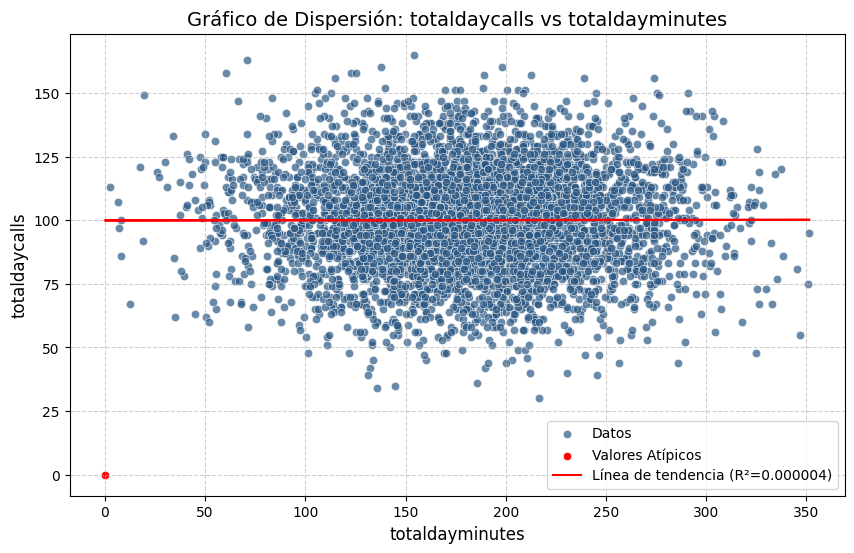

In [ ]:
# Análisis visual de gráficos de dispersión

# Función para graficar la dispersión entre dos variables numéricas, destacando valores atípicos
def scatter_plot_with_outliers(df, column_x, column_y, title=None, color="#2A5783", alpha=0.7, trendline=True, factor=1.5):
    # Validaciones de existencia de columnas
    if column_x not in df.columns:
        raise ValueError(f"La columna '{column_x}' no existe en el DataFrame.")
    if column_y not in df.columns:
        raise ValueError(f"La columna '{column_y}' no existe en el DataFrame.")

    # Detección de valores atípicos para ambas columnas
    outliers_x = identificar_atipicos(df, column_x, factor)
    outliers_y = identificar_atipicos(df, column_y, factor)

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=column_x, y=column_y, color=color, alpha=alpha, label="Datos")

    # Resaltar valores atípicos
    if not outliers_x.empty or not outliers_y.empty:
        outliers = df.loc[outliers_x.index.intersection(outliers_y.index)]
        if not outliers.empty:
            sns.scatterplot(data=outliers, x=column_x, y=column_y, color="red", label="Valores Atípicos")

    if trendline:
        x = df[column_x]
        y = df[column_y]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        plt.plot(x, slope * x + intercept, color='red', label=f'Línea de tendencia (R²={r_value**2:.6f})')

    # Configuración del título y etiquetas
    plt.title(title if title else f"Gráfico de Dispersión: {column_y} vs {column_x}", fontsize=14)
    plt.xlabel(column_x, fontsize=12)
    plt.ylabel(column_y, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


scatter_plot_with_outliers(
    df=df_transformed,
    column_x="totaldayminutes",
    column_y="totaldaycalls"
)

In [ ]:
# Z-scores o IQR

# Función para  calcular los límites de IQR para identificar valores atípicos
def calculate_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return lower_bound, upper_bound, IQR

In [ ]:
# Función para detectar los valores atípicos utilizando IQR
def detect_columns_with_outliers(df, factor=1.5):
    outlier_columns = []
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        lower_bound, upper_bound, _ = calculate_iqr(df, col, factor)
        # Verificar si hay valores fuera de los límites
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(col)
            print(f"Columna '{col}' tiene {len(outliers)} valores atípicos.")

    return outlier_columns

# Detectar columnas con valores atípicos
outlier_columns = detect_columns_with_outliers(df_transformed)
print(f"\nColumnas con valores atípicos: {outlier_columns}")


Columna 'accountlength' tiene 24 valores atípicos.
Columna 'totaldayminutes' tiene 34 valores atípicos.
Columna 'totaldaycalls' tiene 35 valores atípicos.
Columna 'totaldaycharge' tiene 34 valores atípicos.
Columna 'totaleveminutes' tiene 43 valores atípicos.
Columna 'totalevecalls' tiene 27 valores atípicos.
Columna 'totalevecharge' tiene 42 valores atípicos.
Columna 'totalnightminutes' tiene 39 valores atípicos.
Columna 'totalnightcalls' tiene 43 valores atípicos.
Columna 'totalnightcharge' tiene 39 valores atípicos.
Columna 'totalintlminutes' tiene 72 valores atípicos.
Columna 'totalintlcalls' tiene 74 valores atípicos.
Columna 'totalintlcharge' tiene 72 valores atípicos.
Columna 'numbercustomerservicecalls' tiene 399 valores atípicos.

Columnas con valores atípicos: ['accountlength', 'totaldayminutes', 'totaldaycalls', 'totaldaycharge', 'totaleveminutes', 'totalevecalls', 'totalevecharge', 'totalnightminutes', 'totalnightcalls', 'totalnightcharge', 'totalintlminutes', 'totalintlcal

In [ ]:
# Función para reemplazar valores atípicos  en una columna por su mediana
def impute_outliers_with_median(df, column, factor=1.5):
    lower_bound, upper_bound, _ = calculate_iqr(df, column, factor)
    median = df[column].median()

    print(f"\nProcesando columna '{column}'")
    print(f"- Límite inferior: {lower_bound}")
    print(f"- Límite superior: {upper_bound}")
    print(f"- Mediana: {median}")

    df[column] = df[column].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )

    return df

# Aplicar imputación
for col in outlier_columns:
    df_transformed = impute_outliers_with_median(df_transformed, col)

print("\nVerificando nuevamente valores atípicos:")
detect_columns_with_outliers(df_transformed)


Procesando columna 'accountlength'
- Límite inferior: -8.0
- Límite superior: 208.0
- Mediana: 100.0

Procesando columna 'totaldayminutes'
- Límite inferior: 34.94999999999999
- Límite superior: 324.95
- Mediana: 180.1

Procesando columna 'totaldaycalls'
- Límite inferior: 48.0
- Límite superior: 152.0
- Mediana: 100.0

Procesando columna 'totaldaycharge'
- Límite inferior: 5.949999999999999
- Límite superior: 55.230000000000004
- Mediana: 30.62

Procesando columna 'totaleveminutes'
- Límite inferior: 64.78750000000001
- Límite superior: 335.6875
- Mediana: 201.0

Procesando columna 'totalevecalls'
- Límite inferior: 46.5
- Límite superior: 154.5
- Mediana: 100.0

Procesando columna 'totalevecharge'
- Límite inferior: 5.5000000000000036
- Límite superior: 28.539999999999996
- Mediana: 17.09

Procesando columna 'totalnightminutes'
- Límite inferior: 65.20000000000003
- Límite superior: 336.4
- Mediana: 200.4

Procesando columna 'totalnightcalls'
- Límite inferior: 48.0
- Límite superio

['accountlength',
 'totaldayminutes',
 'totaldaycharge',
 'totaleveminutes',
 'totalevecalls',
 'totalevecharge',
 'totalnightminutes',
 'totalnightcharge',
 'totalintlminutes',
 'totalintlcharge']

## 7. Visualización de los datos


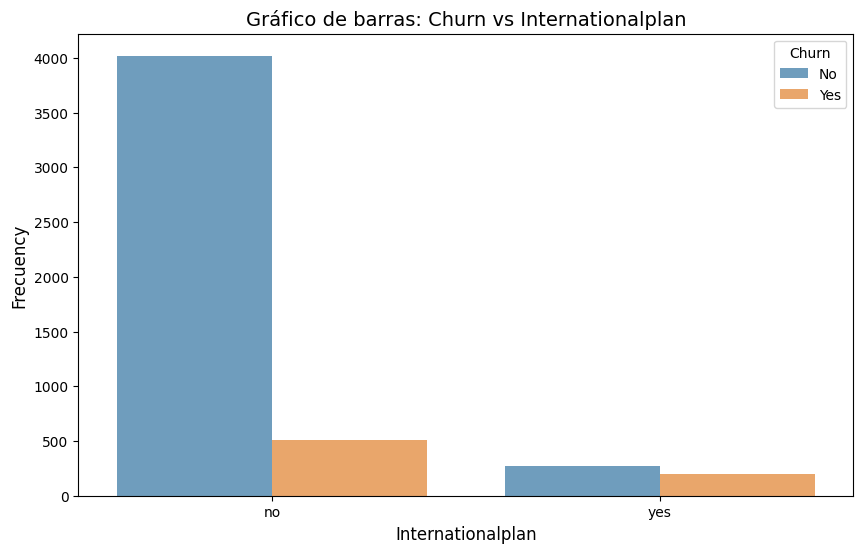

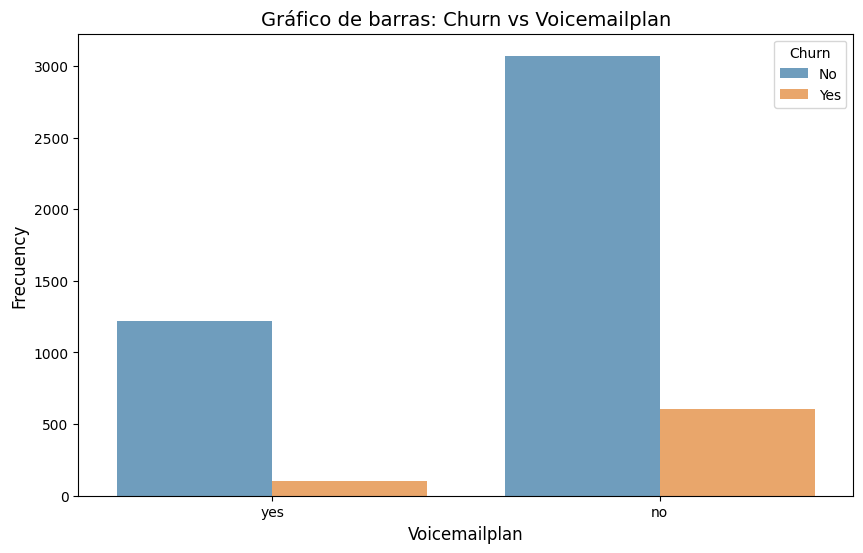

In [ ]:
# Gráficos de barras

## Función para crear un gráfico de barras
def plot_categorical_bars(df, column_x, column_y, alpha=0.7, figsize=(10, 6)):
    if column_x not in df.columns:
      raise ValueError(f"La columna '{column_x}' no existe en el DataFrame.")
    if column_y not in df.columns:
      raise ValueError(f"La columna '{column_y}' no existe en el DataFrame.")

    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column_x, hue=column_y, alpha=alpha)
    plt.title(f"Gráfico de barras: {column_y.capitalize()} vs {column_x.capitalize()}", fontsize=14)
    plt.xlabel(column_x.capitalize(), fontsize=12)
    plt.ylabel('Frecuency', fontsize=12)
    plt.legend(title=column_y.capitalize())  # Leyenda
    plt.show()

## Identificación de todas las variables categóricas, para poder compararlas con churn
categorical_columns = df.select_dtypes(include=['string[python]']).columns

## Creación de gráficos
for column in categorical_columns:
  if column != 'churn':
    plot_categorical_bars(df, column_x=column, column_y='churn')


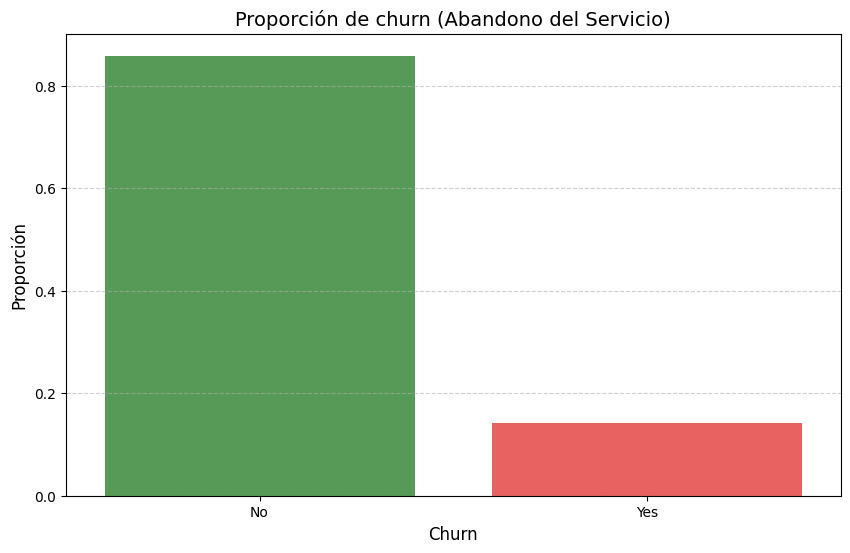

In [ ]:
## Proporción del abandono del servicio de los clientes
plt.figure(figsize=(10, 6))
sns.barplot(
    x=df['churn'].value_counts(normalize=True).index,
    y=df['churn'].value_counts(normalize=True).values,
    hue=df['churn'].value_counts(normalize=True).index,  # Assign hue to x variable
    palette=['green', 'red'],
    alpha=0.7
)
plt.title('Proporción de churn (Abandono del Servicio)', fontsize=14)
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend([], [], frameon=False)  # Remove legend
plt.show()

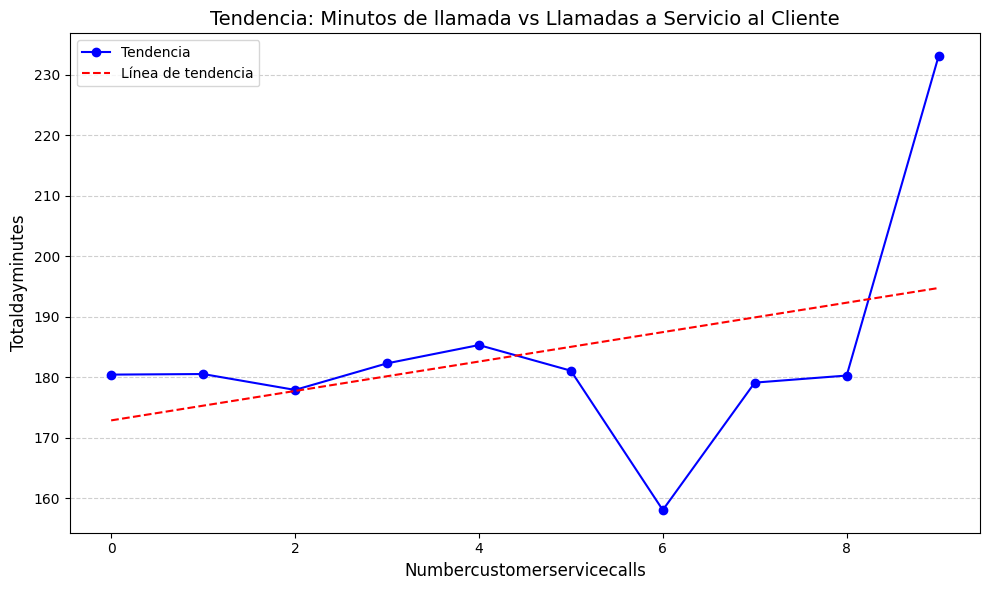

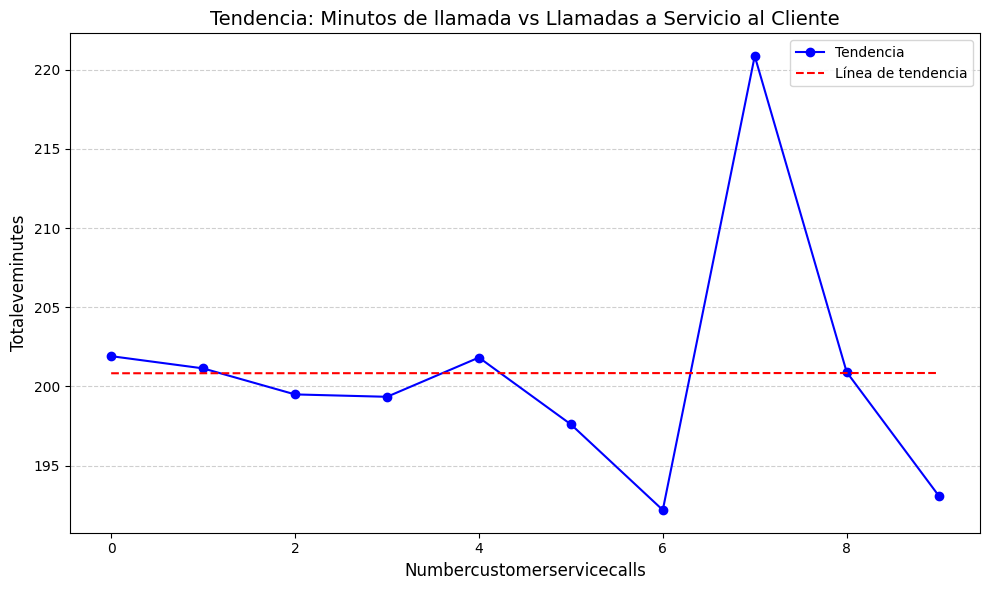

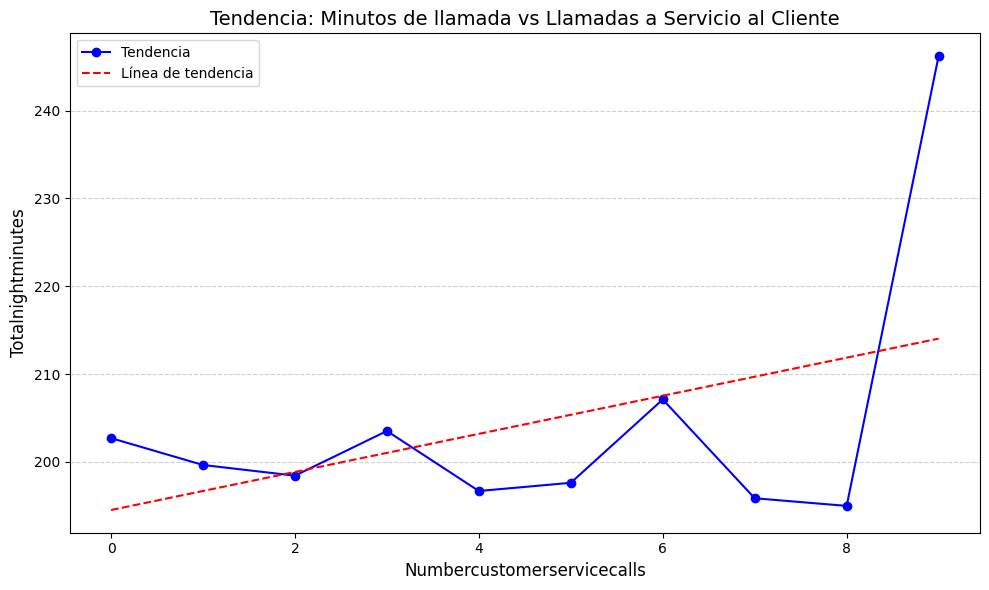

In [ ]:
# Gráficos de líneas

## Función para crear un gráfico de líneas
def plot_line_chart(df, column_x, column_y, color='blue', title='Grafico de lineas', linestyle='-', marker='o', trendline=True, figsize=(10, 6)):
    if column_x not in df.columns:
        raise ValueError(f"La columna '{column_x}' no existe en el DataFrame.")
    if column_y not in df.columns:
        raise ValueError(f"La columna '{column_y}' no existe en el DataFrame.")

    plt.figure(figsize=figsize)
    plt.plot(df[column_x], df[column_y], color=color, linestyle=linestyle, marker=marker, label='Tendencia')

    plt.title('Tendencia: Minutos de llamada vs Llamadas a Servicio al Cliente', fontsize=14)
    plt.xlabel(column_x.capitalize(), fontsize=12)
    plt.ylabel(column_y.capitalize(), fontsize=12)

    # Add trendline if requested
    if trendline:
        z = np.polyfit(df[column_x], df[column_y], 1)  # Linear trendline (degree=1)
        p = np.poly1d(z)
        plt.plot(df[column_x], p(df[column_x]), "r--", label='Línea de tendencia')  # Dashed red line for trendline

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


## Llamada a la función

columns_to_plot = ['totaldayminutes', 'totaleveminutes', 'totalnightminutes']

for column in columns_to_plot:
    grouped = df.groupby('numbercustomerservicecalls')[column].mean().reset_index()

    plot_line_chart(
        df=grouped,
        column_x='numbercustomerservicecalls',
        column_y=column,
        title=f'Tendencia: {column.capitalize()} vs Llamadas a Servicio al Cliente'
    )

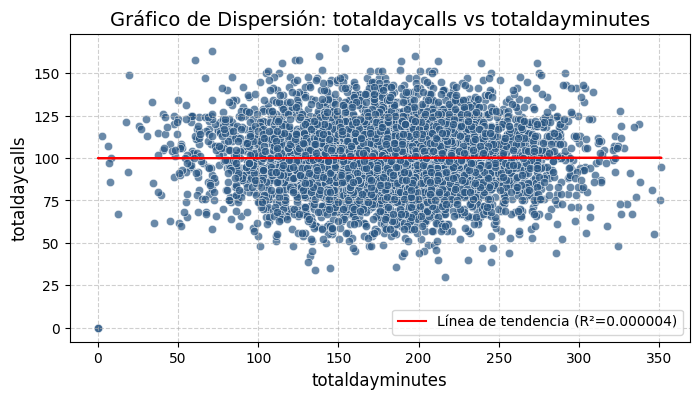

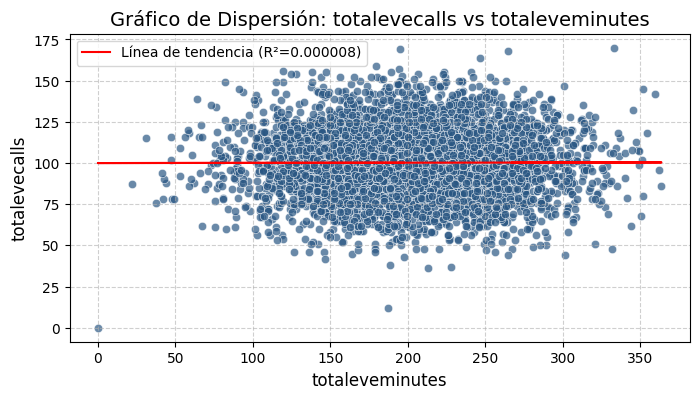

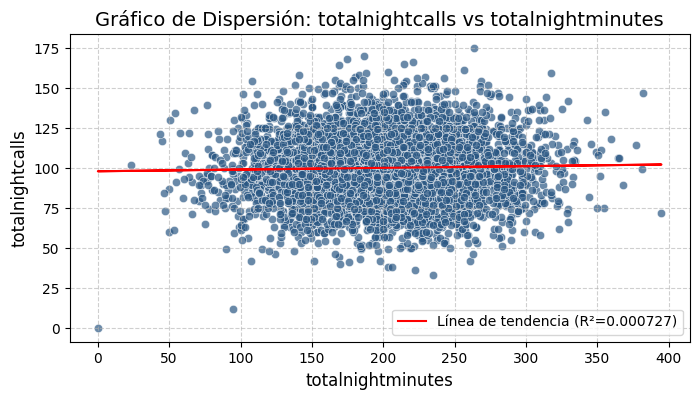

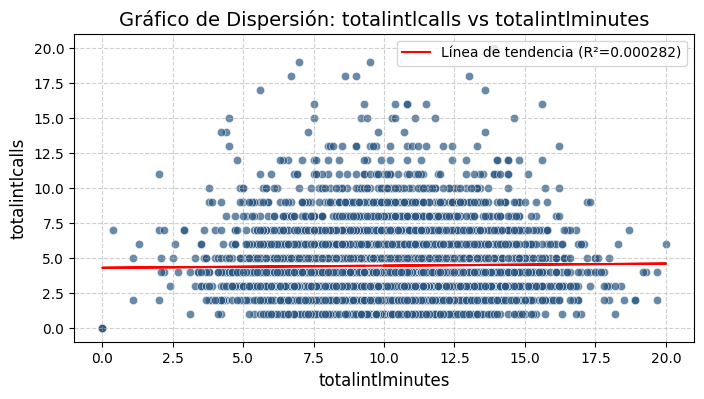

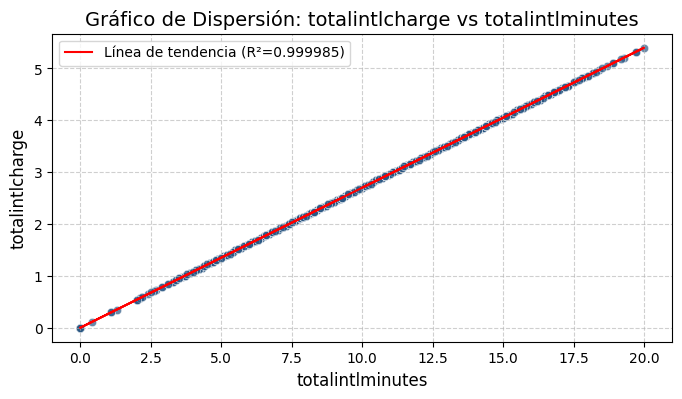

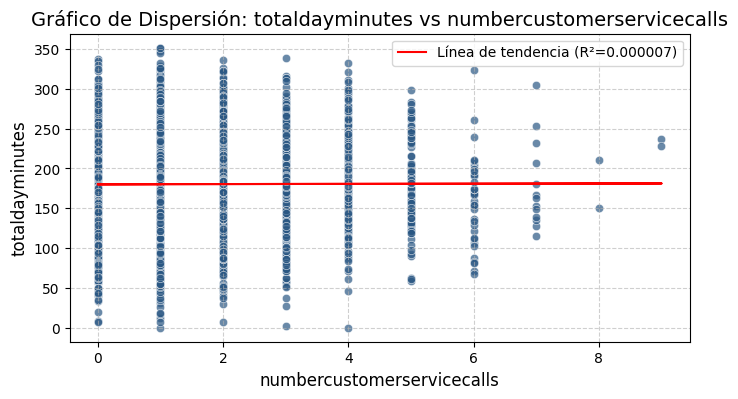

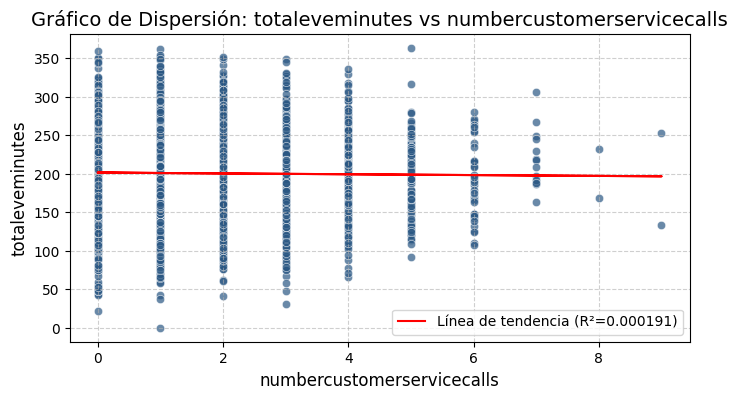

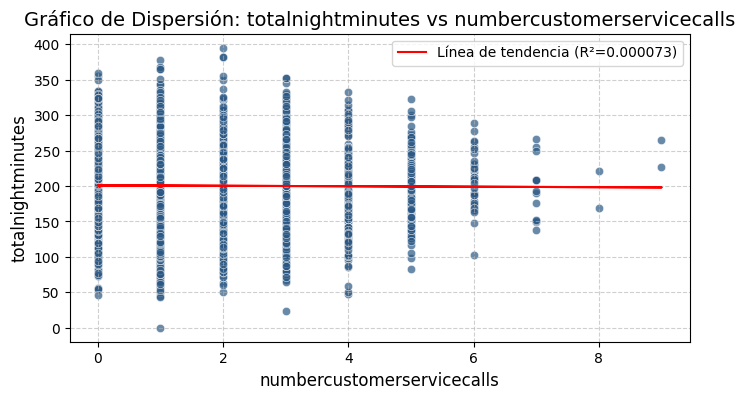

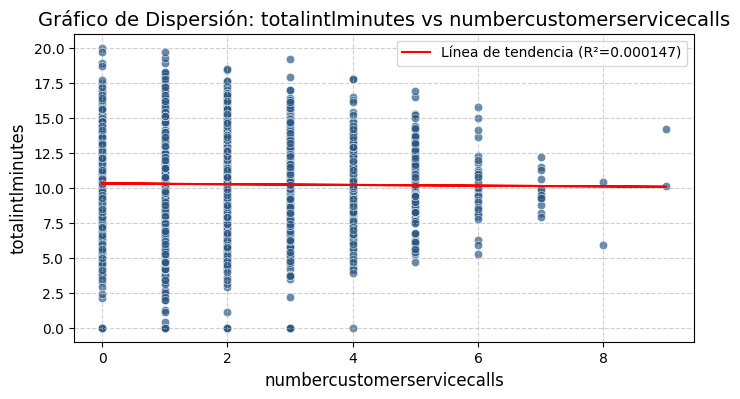

In [ ]:
# Diagramas de dispersión

## Ya existe una función para generar gráficos de dispersión, y aunque los valores relevantes ya se han graficado, aquí se muestra valores alternativos

scatter_pairs = [
    ('totaldayminutes', 'totaldaycalls'),
    ('totaleveminutes', 'totalevecalls'),
    ('totalnightminutes', 'totalnightcalls'),
    ('totalintlminutes', 'totalintlcalls'),
    ('totalintlminutes', 'totalintlcharge'),
    ('numbercustomerservicecalls', 'totaldayminutes'),
    ('numbercustomerservicecalls', 'totaleveminutes'),
    ('numbercustomerservicecalls', 'totalnightminutes'),
    ('numbercustomerservicecalls', 'totalintlminutes')
]

for column_x, column_y in scatter_pairs:
    scatter_plot(
        df=df,
        column_x=column_x,
        column_y=column_y
    )

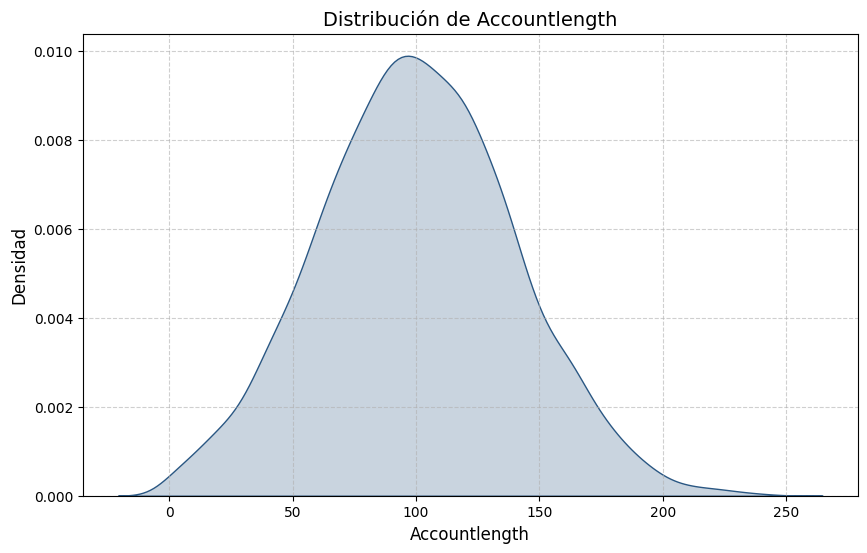

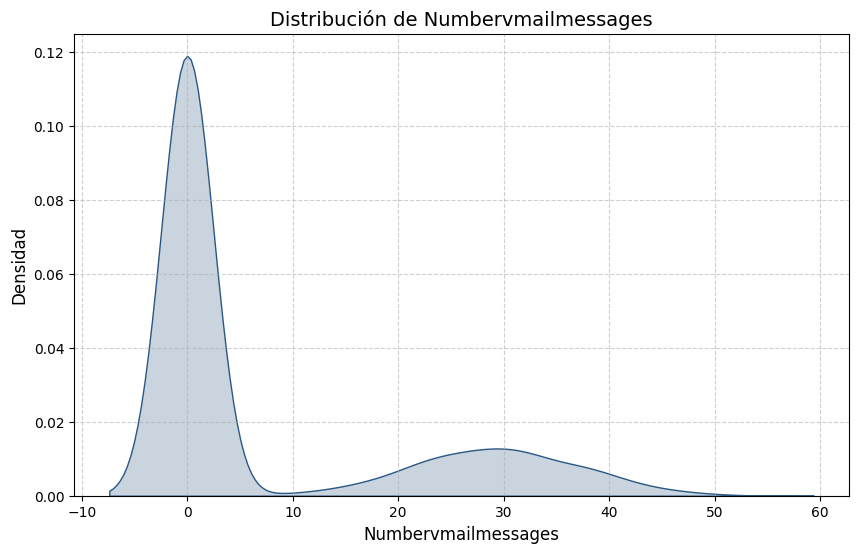

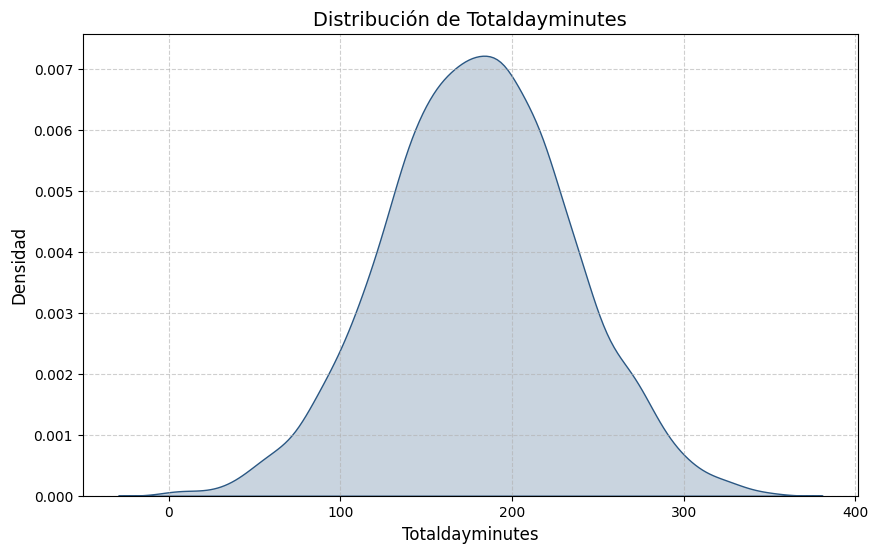

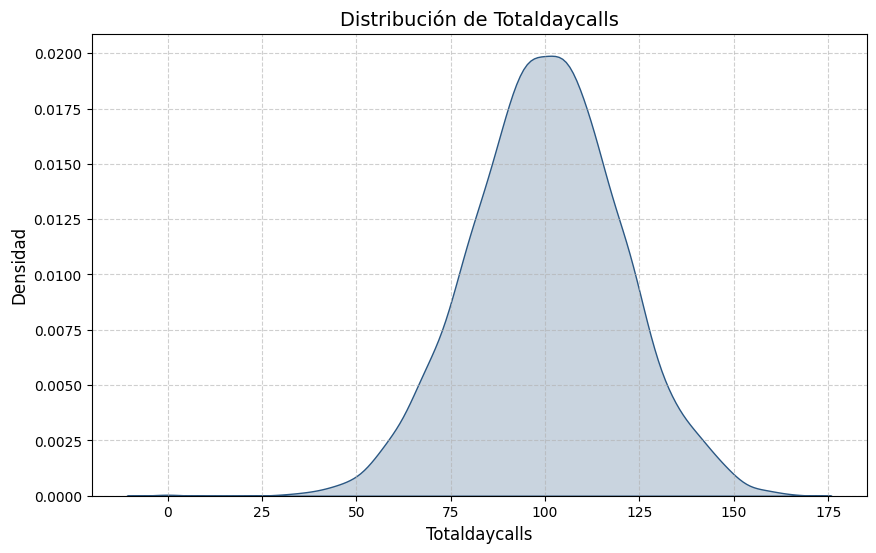

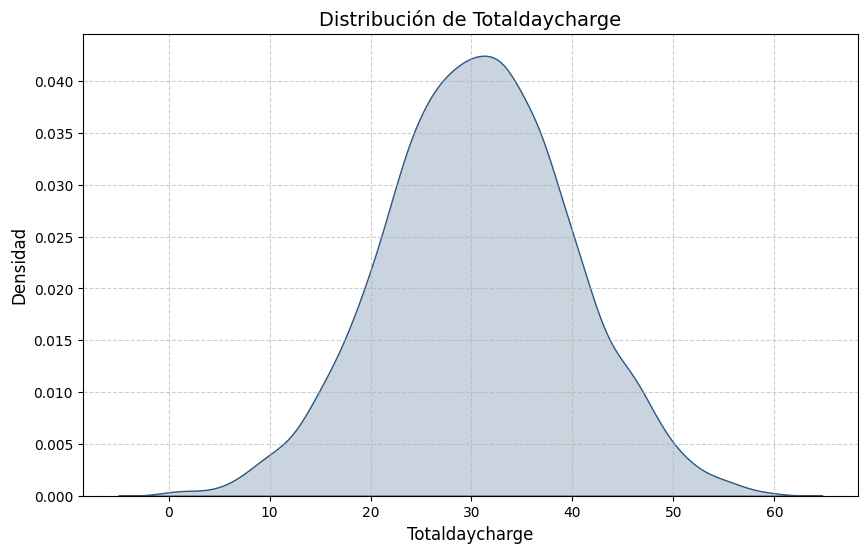

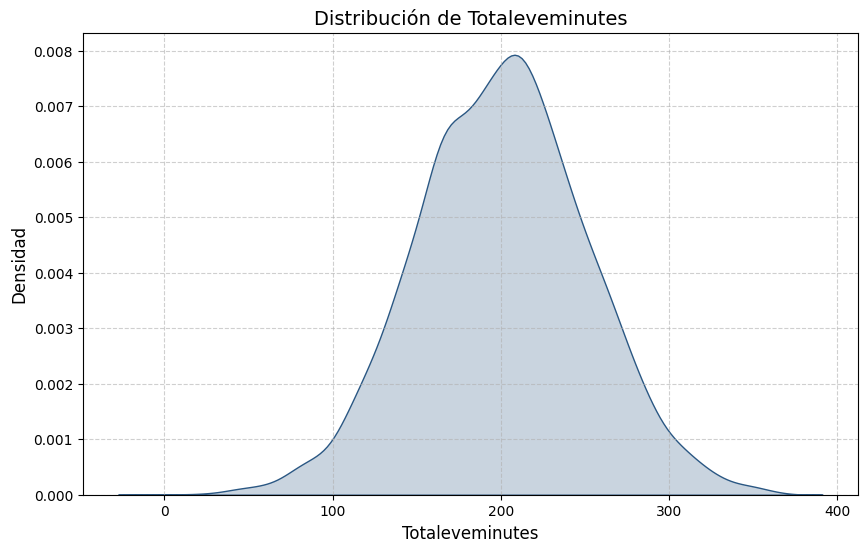

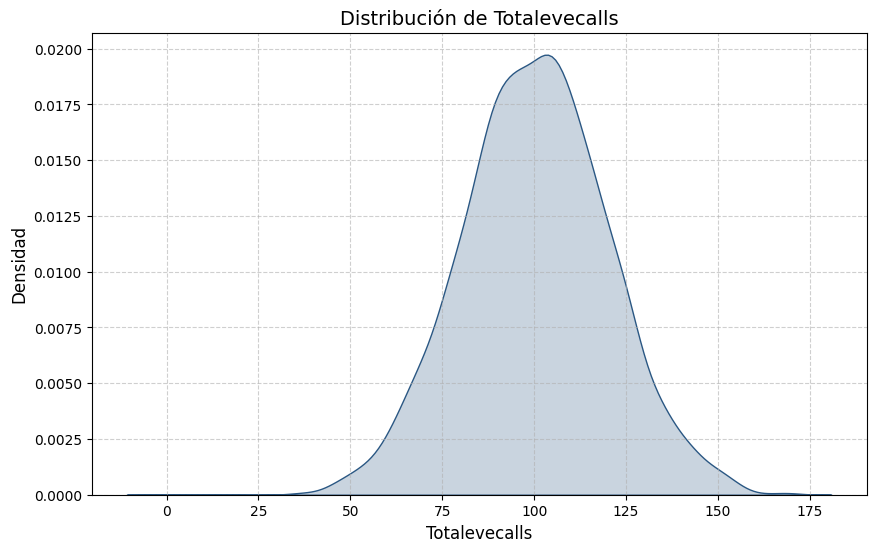

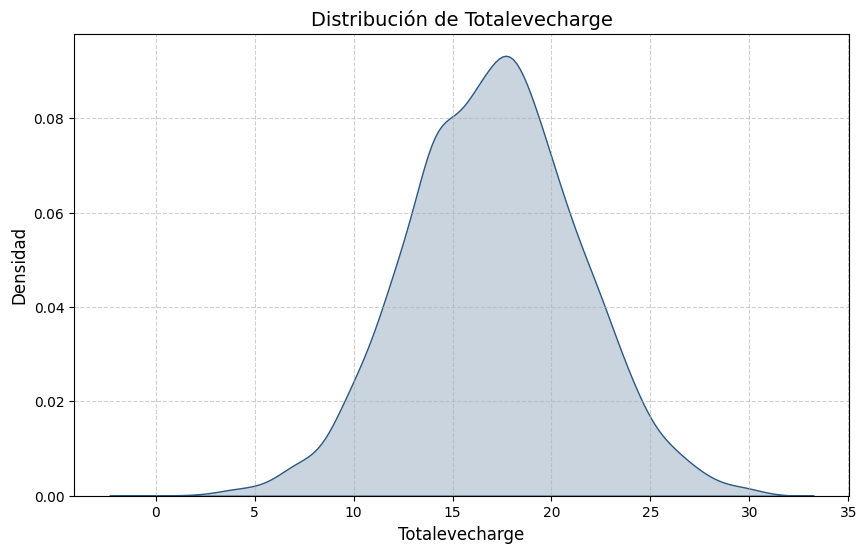

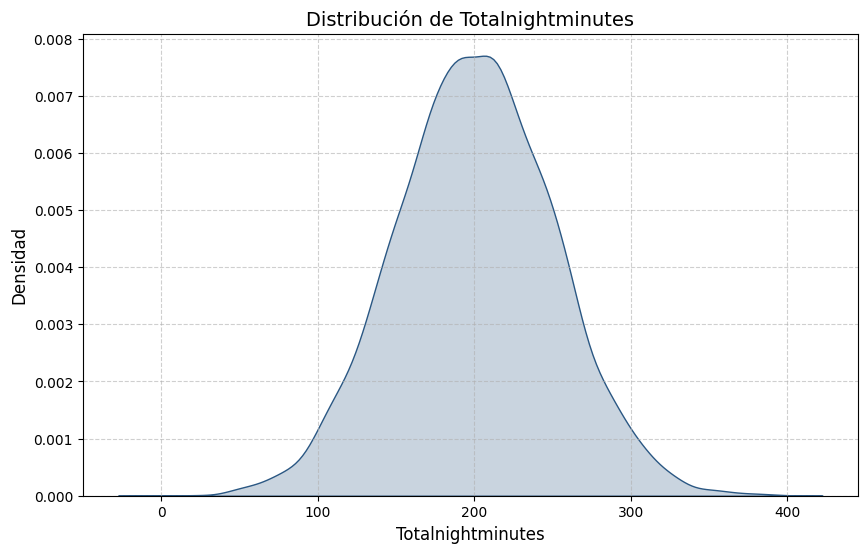

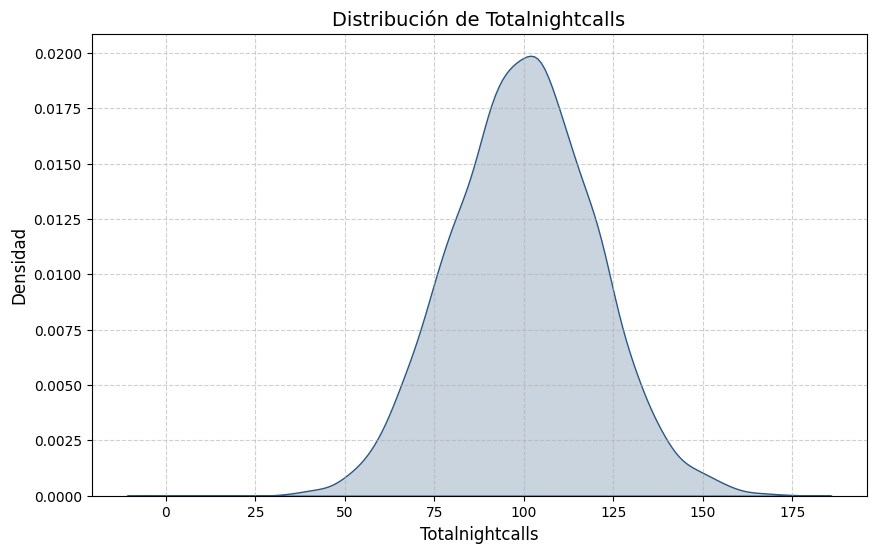

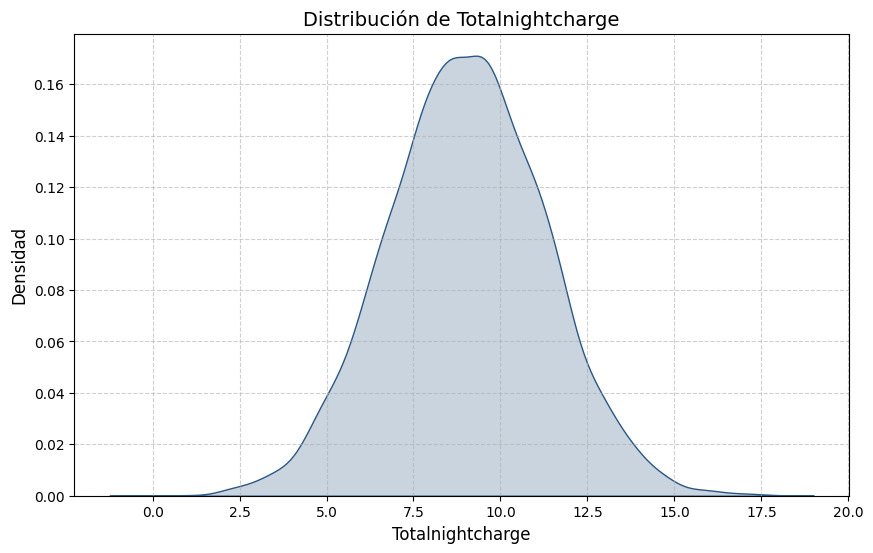

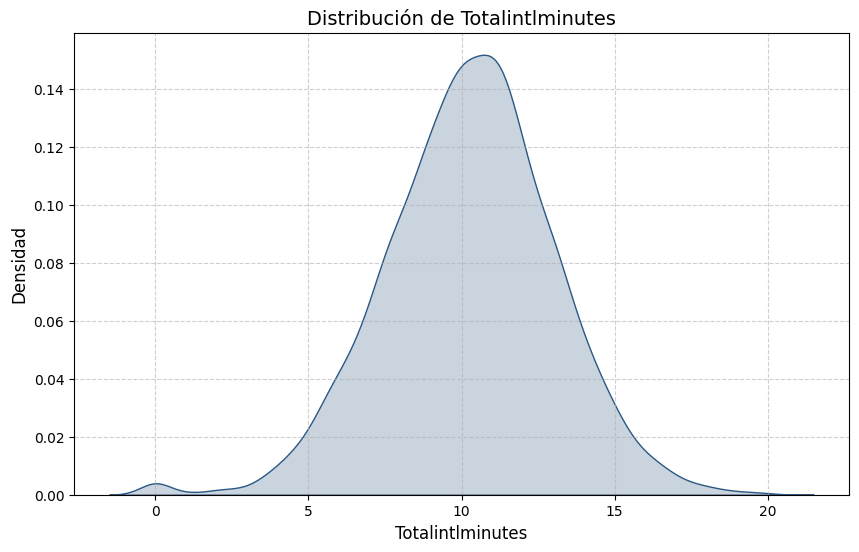

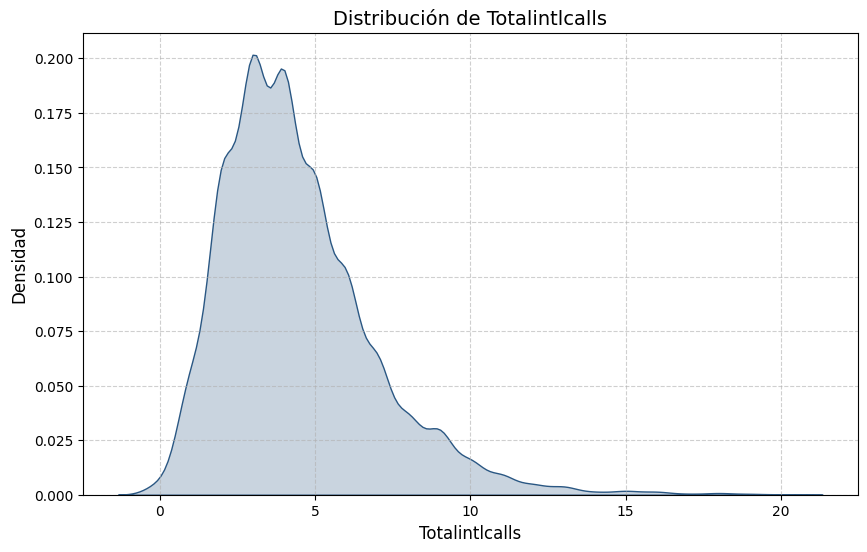

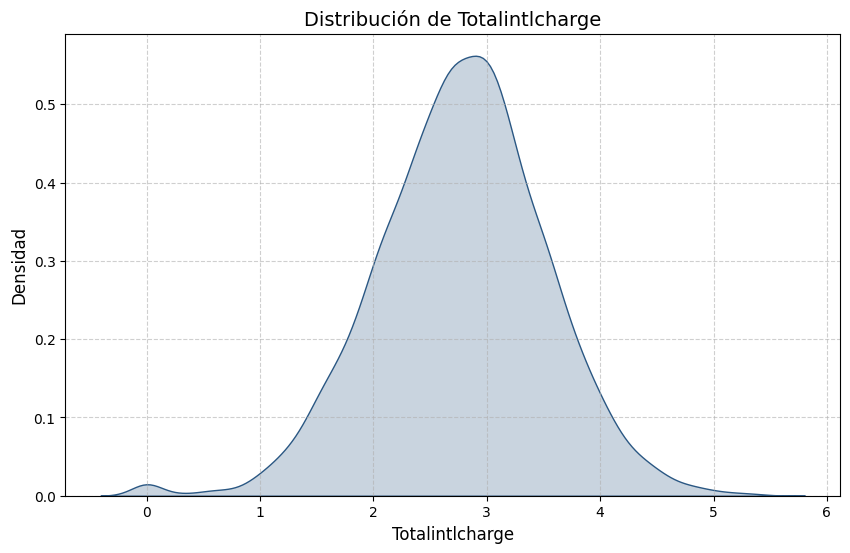

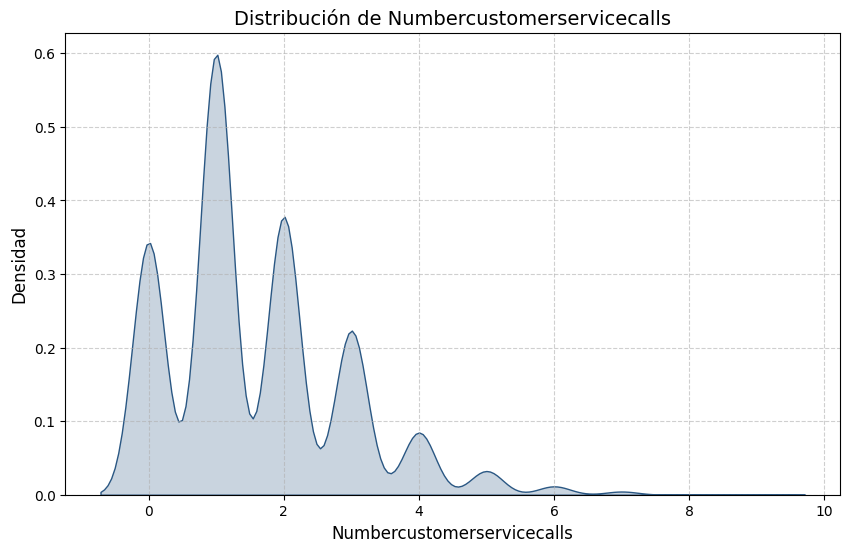

In [ ]:
# Gráficos de densidad

## Función para crear gráficos de densidad
def plot_density(df, column, title='Gráfico de Densidad', color="#2A5783", figsize=(10, 6)):
    if column not in df.columns:
        raise ValueError(f"La columna '{column}' no existe en el DataFrame.")

    # Generar el gráfico de densidad
    plt.figure(figsize=figsize)
    sns.kdeplot(df[column], color=color, fill=True)


    plt.title(title, fontsize=14)
    plt.xlabel(column.capitalize(), fontsize=12)
    plt.ylabel('Densidad', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

for col in numeric_cols:
  plot_density(df, col, title=f'Distribución de {col.capitalize()}')

# De igual manera que con los gráficos de dispersión, ya se tienen algunos ejemplos con las variables numéricas, los siguientes gráficos son simplementes representados de manera ligeramente distinta

## 8. Normalización de datos

### Normalización, estandarización o escalado?

A través de la investigación de diversas fuentes de información, se ha descubierto que no hay una definición demasiado clara acerca de qué es o qué implica cada una de las palabras dadas. Por ejemplo, se observa en algunas partes el uso de la técnica min-max como parte de la normalización, mientras que en otras estos conceptos son divididos, utilizando dicha función min-max en python y normalizer para la normalización.

Es por esto que se ha establecido el siguiente estandar de uso con el fin de poder elegir la opción que más se acomode a los datos.

#### Normalización Min-max
El uso del min-max asume que la distribución utilizada da como resultado valores entre 0 y 1, siendo 0 el valor más pequeño, sea el número que sea, y 1 el valor más grande, nuevamente, sea el número que sea. Esto es especialmente útil cuando hay que realizar comparaciones entre grupos de números muy diferentes, como lo es la edad de una persona y su salario.

#### Estandarizado
Aunque los valores no entran dentro de aquel rango 0 a 1, la media será 0 y la desviación estándar 1, aplicable principalmente para figuras con forma de campana.

#### Escalado
Cuando se desea especialmente olvidarse de los valores atípicos, el escalado robusto es el ideal, utilizando únicamente los datos de los dos cuartiles centrales.

#### Veredicto
Si se observa la distribución de cada una de las variables cuantitativas que se tiene, en este caso 15, 12 de ellas tienen forma de campana y unos valores máximos que aunque varían ligeramente entre sí: 250, 60, 400, 175, 60, 400, 175, 35, 400, 175, 17, 20, 20, 5, 10, no hay razón suficiente como para aplicar la normalización.

Dado que en estas 12 columnas los variables atípicos son pocos, la decisión final es utilizar el __estandarizado__, los gráficos ya presentan asimetría y  tenerlos en el mismo rango de valores ayudará tremendamente a las futuras regresiones lineales y minería que se quiera realizar.

_Como una nota, se ha de aclarar que esta decisión es con los valores ya alterados a través de la eliminación de la mayoría de valores atípicos._

### Bibliografía
Codigo Maquina. (2021, 27 septiembre). Escalamiento, Normalización y Estandarización de Datos con Python para Ciencia de Datos [Vídeo]. YouTube. https://www.youtube.com/watch?v=-VuR14Qyl7E

Raschka, S., & Mirjalili, V. (2021). Machine Learning mit Python und Keras, TensorFlow2 und Scikit-learn: Das umfassende Praxis-Handbuch für Data Science, Deep Learning und Predictive Analytics.



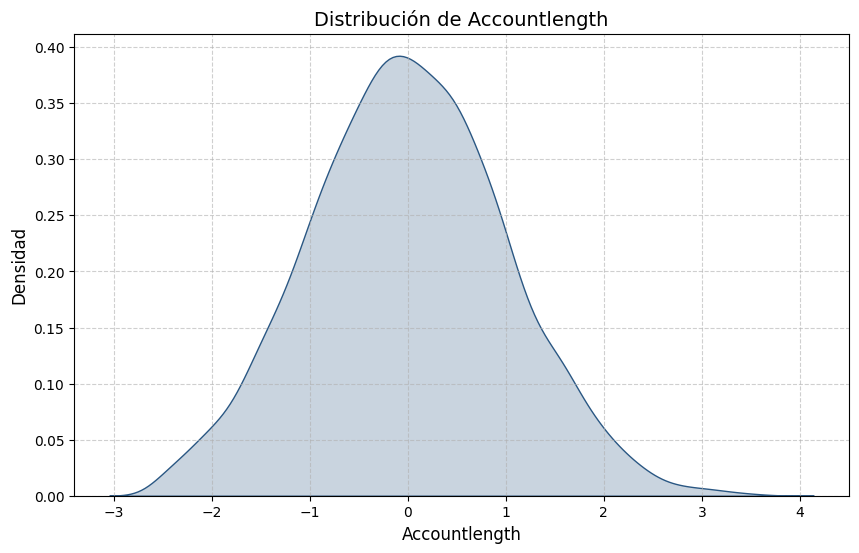

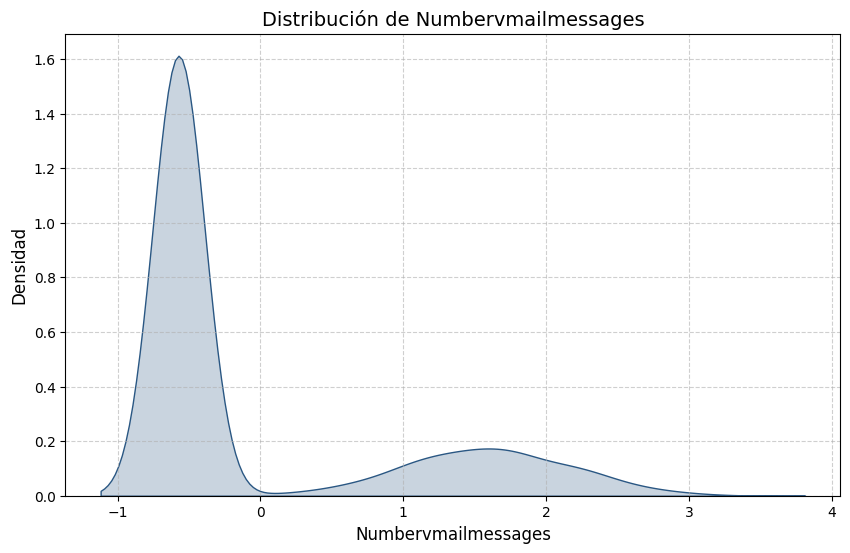

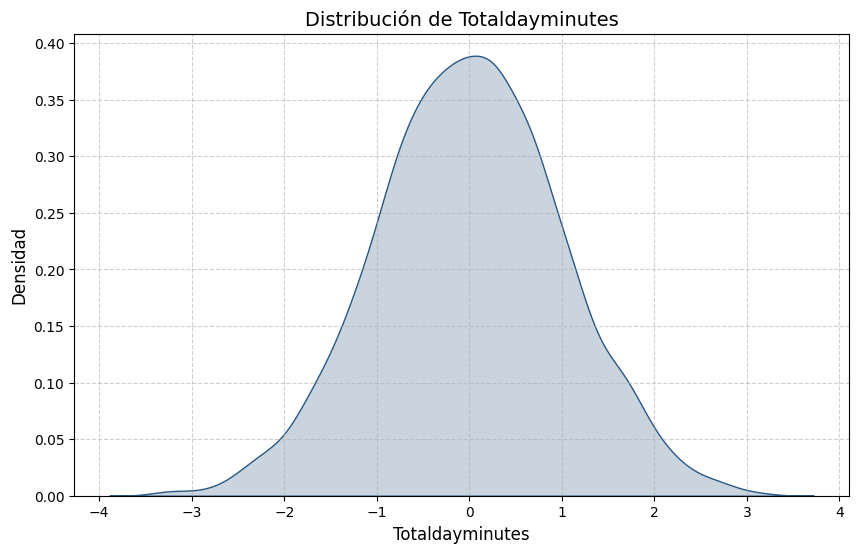

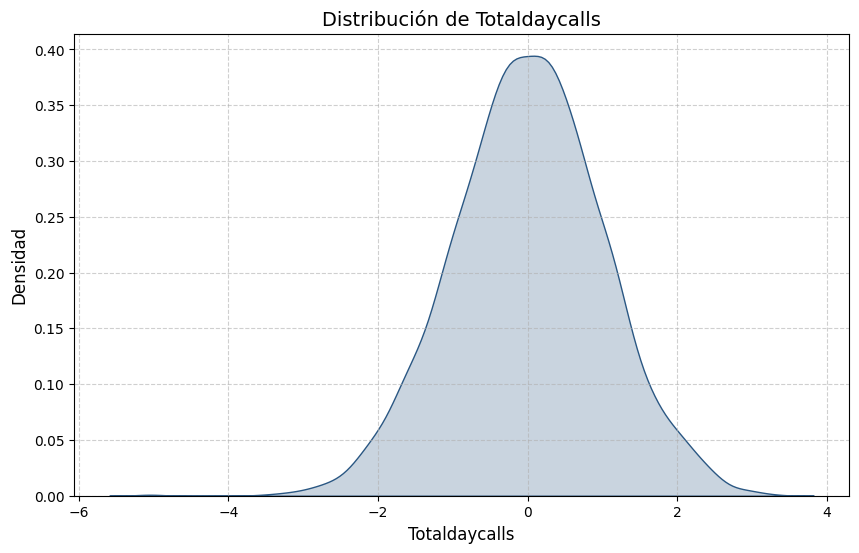

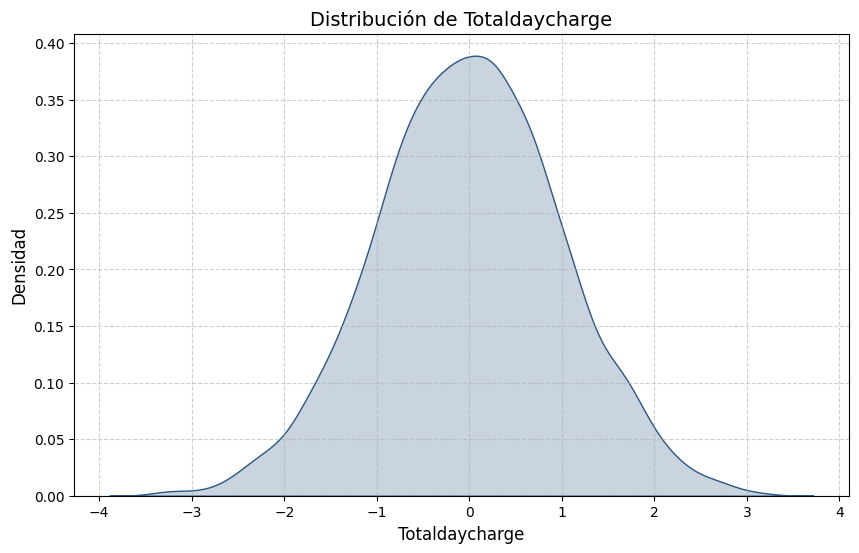

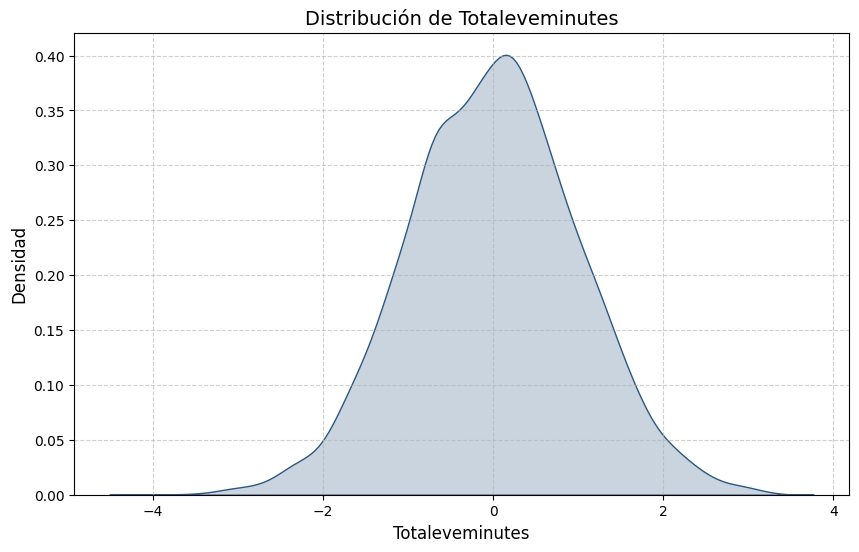

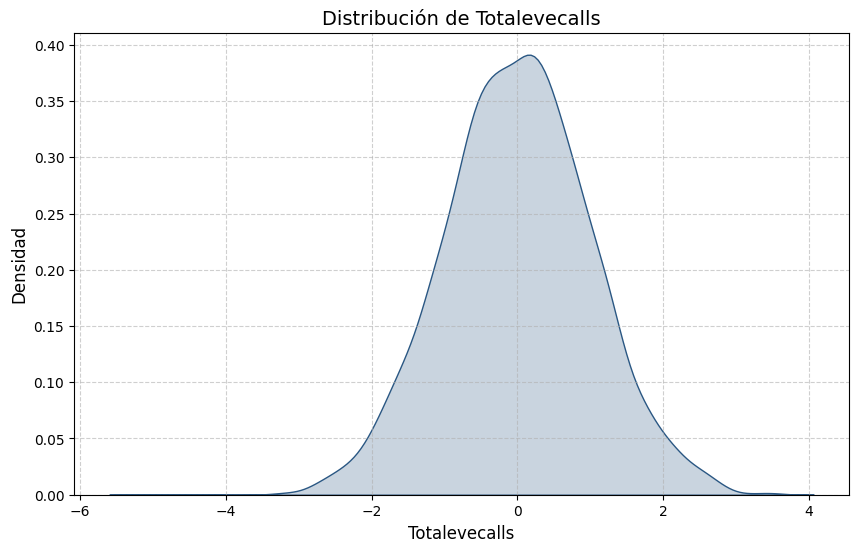

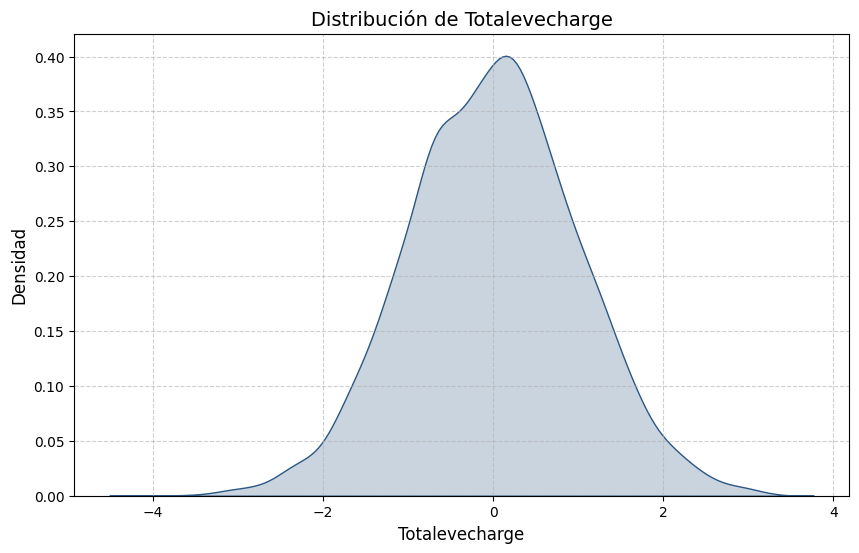

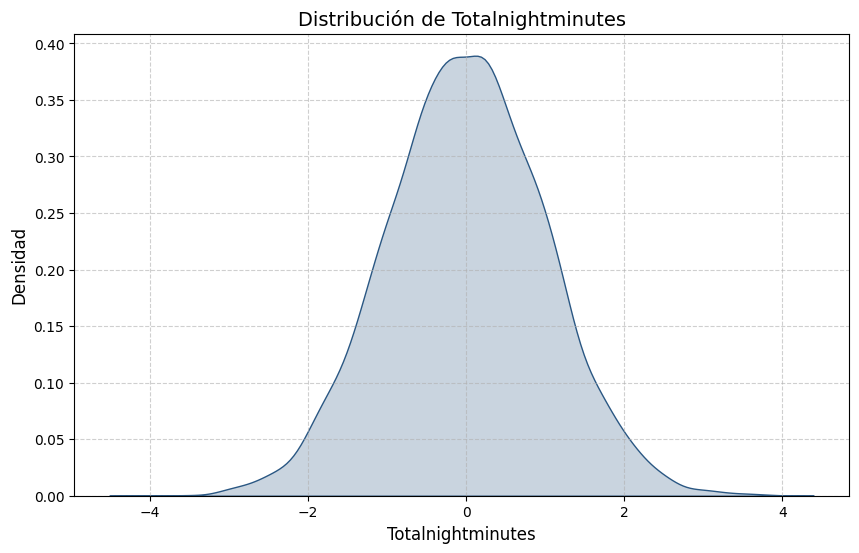

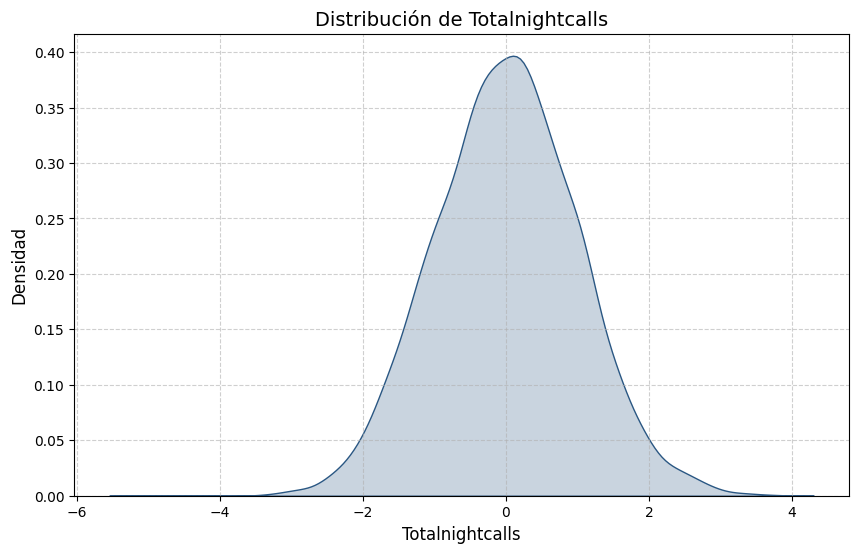

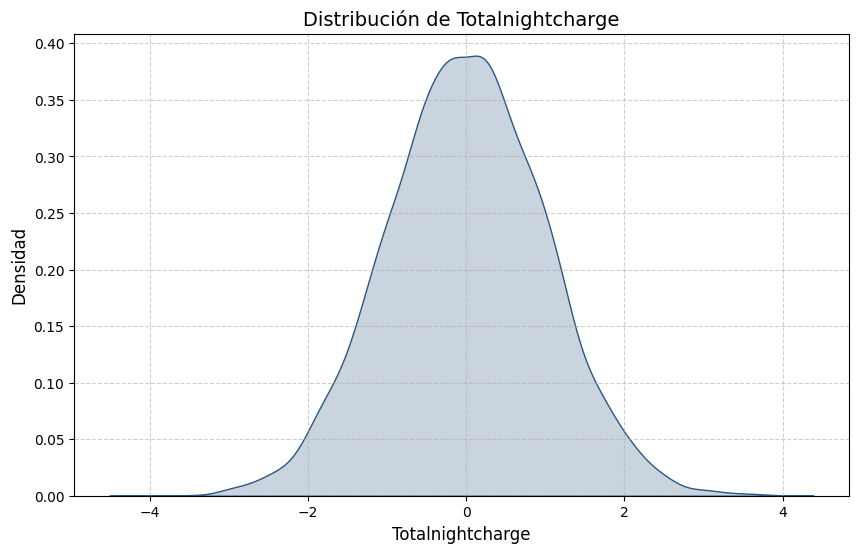

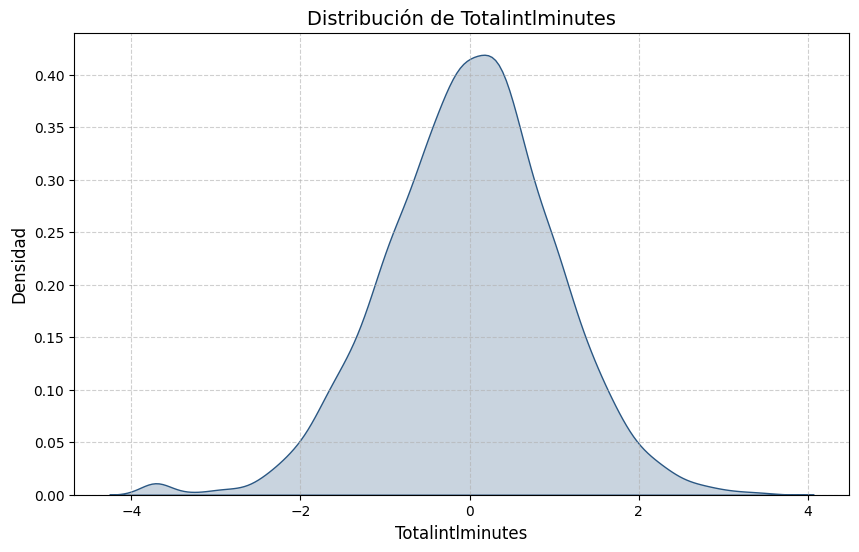

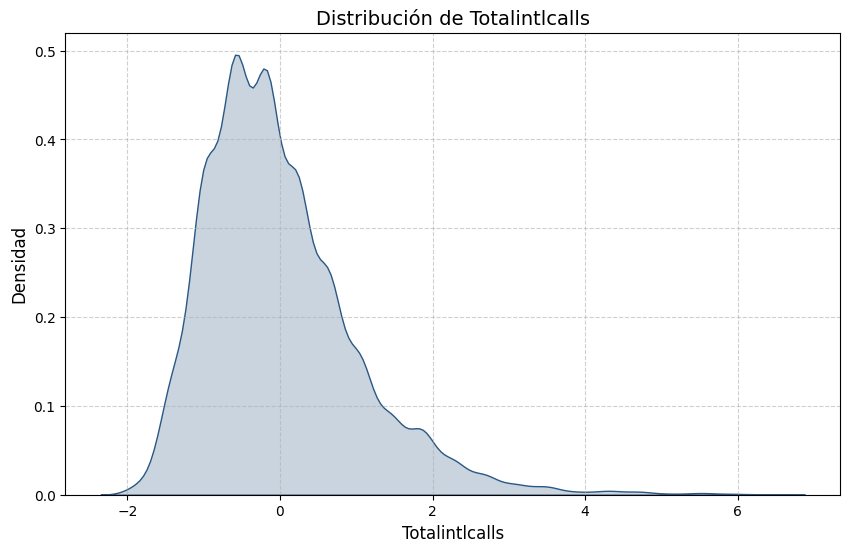

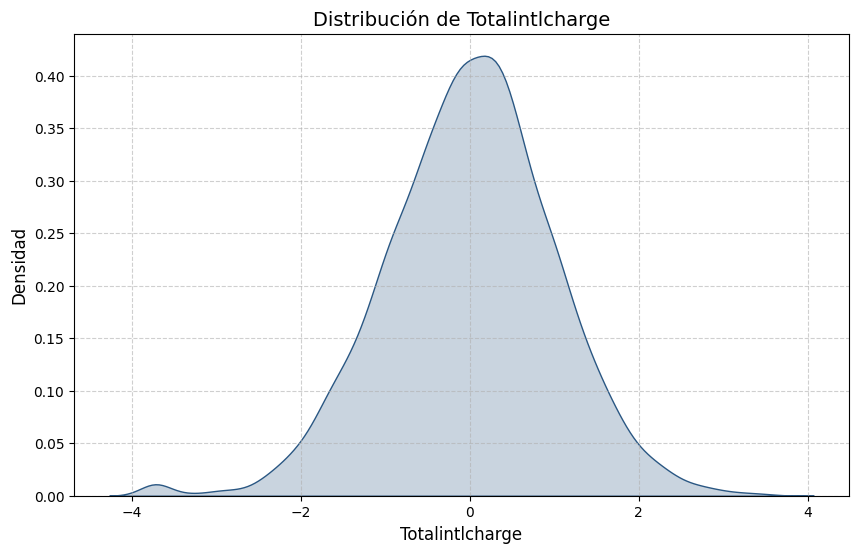

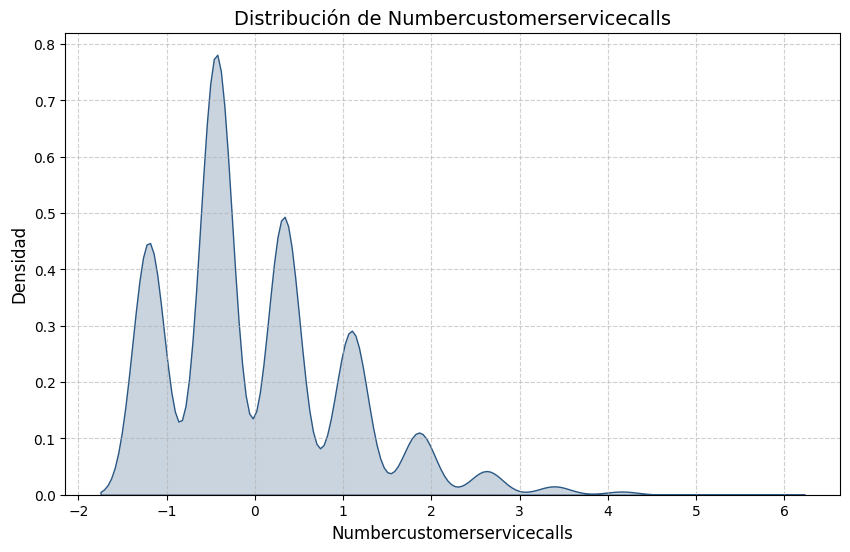

In [ ]:
# Puesto en práctica...

df_scaled = df.copy()

for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    df_scaled[col] = (df[col] - mean) / std

for col in numeric_cols:
  plot_density(df_scaled, col, title=f'Distribución de {col.capitalize()}')

## 9. Resúmenes y conclusiones


### Resumen de hallazgos

A través del desarrollo del código y la visualización de los gráficos se han encontrados varios puntos interesantes por mencionar.

El primero de ellos es la cantidad de valores atípicos encontrados, lo cual refleja mucho en la calidad de los datos obtenidos. 4 de las columnas presentaron cantidades de valores atípicos de más de 43, y ninguno presentó más de 118, teniendo en cuenta que hay 5000, esto representa entre un 0.86% hasta un 2.36% de valores atípicos, haciendo de este conjunto de datos un paraíso con el cual trabajar al que simplemente se le pueden reemplazar estos valores con su media.

Otro descubrimiento interesante es que las variables de dispersión relacionadascon la cantidad de minutos de llamada y la cantidad cobrada son una línea recta en las tres instancias de tiempo: mañana, tarde y noche. Esto significa que el servicio no cobra de manera adicional por el uso del celular en ciertas horas más que en otras.

Finalmente, observando los gráficos de densidad se puede ver que casi todos mantienen la campana de Gauss; con tan sólo 3 columnas con datos cuantitativos que presentan los suficientes valores atípicos como para tener una simetría positiva. El gráfico de número de llamadas puede verse algo distinto, pero esto es simplemente por la característica discreta, y no continua, de la variable.

### Preparación para modelado

#### Selección de variables
Como primer paso habrá que seleccionar del conjunto de variables disponibles, aquellas que tengan más relevancia con el tema que se quiere utilizar. Esto implica identificar aquellas que más información aportan o que son importantes para poner un contexto al resto, como la cantidad de minutos al día de llamada, en este caso.

#### Preparación de los datos
Esta sección ya se ha hecho en su mayoría, implica la limpieza, normalización, estandarización, eliminación de valores atípicos y demás pasos con los que al final se obtengan columnas de rangos similares y con distribuciones lo suficientemente normales como para poder entrenar una modelo en ellos. En este caso ya el paso está hecho y los datos están casi listos para usarse.

#### División de los datos
Los datos deben de ser separados entre un conjunto que será utilizado de prueba y otro conjunto a utilizar como entrenamiento. Con el conjutno de prueba es que se estará evaluando el modelo al final.

#### Selección del modelo
La selección del modelo se debe de hacer de manera cautelosa y basado en información previa, esto significa que se tienen que tener en cuenta la variación entre los valores de las variables seleccionadas para escoger un modelo que no se vea negativamente afectado por alguna característica que resalte en estos conjuntos de datos.

#### Finalmente,
Lo único que queda es empezar a entrenar el modelo!